In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
from scipy.stats import norm
from matplotlib.lines import Line2D
%matplotlib inline

In [2]:
def Gaussian(data):
    mu, std = norm.fit(data)
    
    xmin = np.min(data)
    xmax = np.max(data)
    
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    return p

In [3]:
df_G_O = pd.read_csv(r'Channel/G_O_Channel.txt', sep='\t', header = None)
df_P_O = pd.read_csv(r'Channel/P_O_Channel.txt', sep='\t', header = None)

df_G_U = pd.read_csv(r'Channel/G_U_Channel.txt', sep='\t', header = None)
df_P_U = pd.read_csv(r'Channel/P_U_Channel.txt', sep='\t', header = None)

df_G_S = pd.read_csv(r'Channel/G_S_Channel.txt', sep='\t', header = None)
df_P_S = pd.read_csv(r'Channel/P_S_Channel.txt', sep='\t', header = None)

In [4]:
df_G_S.rename(columns = lambda s: s+1, index = lambda s: s+1)
#The rows and columns represent the steps (billiards setups of chaotic ensemble) and the open channels, respectively.

,1,2,3,4,5,6,7,8,9,10
1,1.559360,2.69411,3.35755,4.01972,5.31624,6.17250,7.50374,8.64693,9.21969,10.28540
2,0.991814,2.48295,3.41832,4.06055,5.58627,5.62741,7.44241,7.40409,9.71497,9.68430
3,1.305520,1.93877,3.74643,3.67274,5.40686,5.33675,7.16089,8.01317,9.43884,9.82892
4,1.514670,2.12715,3.37269,4.80089,5.09379,6.15589,7.11654,8.52907,10.14010,10.66830
5,1.457870,2.01925,3.26466,4.51817,5.34878,5.69929,7.08775,8.56176,8.73464,10.83230
...,...,...,...,...,...,...,...,...,...,...
99996,1.755910,2.49533,3.48873,3.61569,5.22143,6.74388,7.77766,7.88185,9.23334,11.04580
99997,1.887780,2.69401,3.16790,4.44918,4.78825,6.29871,7.86157,8.15031,8.86686,10.47160
99998,1.677540,2.97742,3.57521,3.58284,4.72351,6.07161,7.09906,8.12418,9.02972,10.07050
99999,0.313642,2.41989,3.59931,4.86379,5.39878,6.12824,7.20582,7.83962,8.69332,11.01810


In [5]:
G_O = df_G_O.values
P_O = df_P_O.values

G_U = df_G_U.values
P_U = df_P_U.values

G_S = (df_G_S.values)/2
P_S = (df_P_S.values)/2

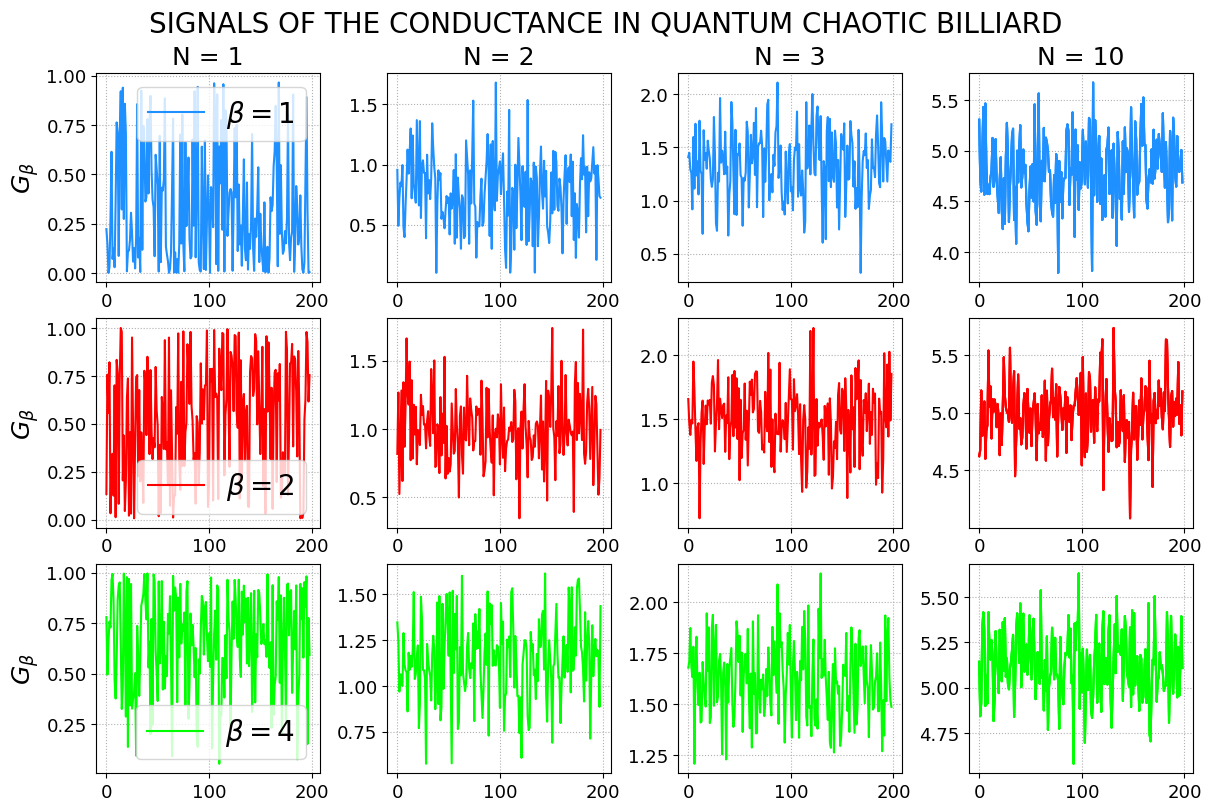

In [6]:
fig, axs = plt.subplots(3,4, figsize = (12,8), constrained_layout = True, facecolor = 'w')

fig.suptitle(r'SIGNALS OF THE CONDUCTANCE IN QUANTUM CHAOTIC BILLIARD', fontsize = 20)

for j in range(0,4):
    for i in range(0,3):
        
        axs[i,j].tick_params(axis='both', which = 'major', labelsize = 13)
        
        if (j == 3):
            
            axs[0,3].set_title('N = 10', fontsize = 18) 
            
            axs[0,3].plot(G_O[0:199,9], color='dodgerblue', label = r'$\beta = 1$', alpha=1);
            axs[1,3].plot(G_U[0:199,9], color='red', label = r'$\beta = 2$', alpha=1);
            axs[2,3].plot(G_S[0:199,9], color='lime', label = r'$\beta = 4$', alpha=1);
            
        else:
            axs[0,j].set_title('N = '+ str(j+1), fontsize = 18)
            if (i == 0):
                axs[i,j].plot(G_O[0:199,j], color='dodgerblue', label = r'$\beta = 1$', alpha=1);
            else:
                if (i == 1):
                    axs[i,j].plot(G_U[0:199,j], color='red', label = r'$\beta = 2$', alpha=1);
                else:
                    if (i == 2):
                        axs[i,j].plot(G_S[0:199,j], color='lime', label = r'$\beta = 4$', alpha=1);
        
        if (j == 0):
            axs[i,0].set_ylabel(r'$G_{\beta}$', fontsize = 18)
            axs[i,0].legend(fontsize = 20)
            
        axs[i,j].grid(linestyle=':')


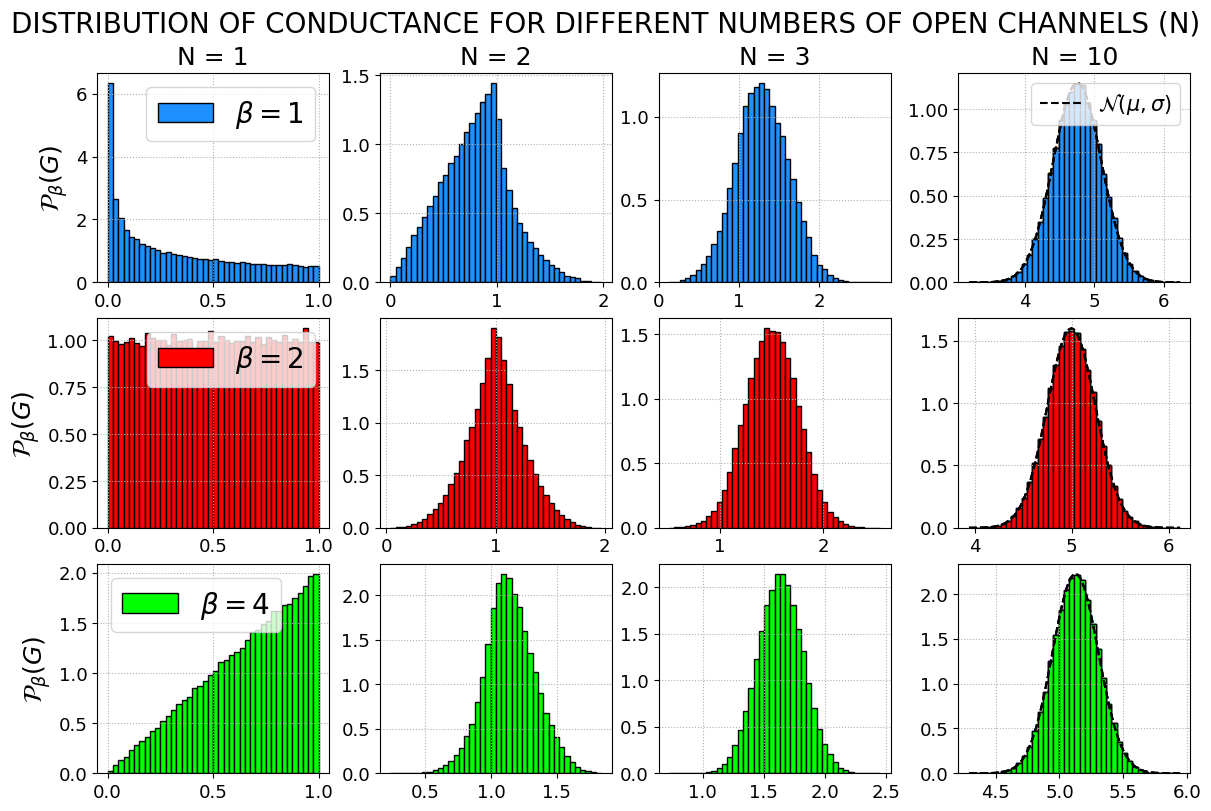

In [7]:
steps = 50

fig, axs = plt.subplots(3,4, figsize = (12,8), constrained_layout = True, facecolor = 'w')

fig.suptitle(r'DISTRIBUTION OF CONDUCTANCE FOR DIFFERENT NUMBERS OF OPEN CHANNELS (N)', fontsize = 20)

for j in range(0,4):
    for i in range(0,3):
        
        axs[i,j].tick_params(axis='both', which = 'major', labelsize = 13)
        
        if (j == 3):
            
            axs[0,3].set_title('N = 10', fontsize = 18) 
            
            axs[0,3].hist(G_O[:,9], bins = 40, color='dodgerblue', alpha=1, density = True, histtype='bar', ec='black');
            axs[1,3].hist(G_U[:,9], bins = 40, color='red', alpha=1, density = True, histtype='bar', ec='black');
            axs[2,3].hist(G_S[:,9], bins = 40, color='lime', alpha=1, density = True, histtype='bar', ec='black');

            x = np.linspace(np.min(G_O[:,9]), np.max(G_O[:,9]), 100)
            axs[0,3].plot(x,Gaussian(G_O[:,9]), color = 'black', label = r'$\mathcal{N}(\mu,\sigma)$', alpha = 1, linewidth = 1.5, linestyle = 'dashed')
            
            x = np.linspace(np.min(G_U[:,9]), np.max(G_U[:,9]), 100)
            axs[1,3].plot(x,Gaussian(G_U[:,9]), color = 'black', alpha = 1, linewidth = 1.5, linestyle = 'dashed')

            x = np.linspace(np.min(G_S[:,9]), np.max(G_S[:,9]), 100)
            axs[2,3].plot(x,Gaussian(G_S[:,9]), color = 'black', alpha = 1, linewidth = 1.5, linestyle = 'dashed')

            
        else:
            axs[0,j].set_title('N = '+ str(j+1), fontsize = 18)
            if (i == 0):
                axs[i,j].hist(G_O[:,j], bins = 40, color='dodgerblue', label = r'$\beta = 1$', alpha=1, density = True, histtype='bar', ec='black');
            else:
                if (i == 1):
                    axs[i,j].hist(G_U[:,j], bins = 40, color='red', label = r'$\beta = 2$', alpha=1, density = True, histtype='bar', ec='black');
                else:
                    if (i == 2):
                        axs[i,j].hist(G_S[:,j], bins = 40, color='lime', label = r'$\beta = 4$', alpha=1, density = True, histtype='bar', ec='black');
        
        if (j == 0):
            axs[i,0].set_ylabel(r'$\mathcal{P}_{\beta}(G)$', fontsize = 18)
            axs[i,0].legend(fontsize = 20)
        
        if (j == 3 and i == 0):
            axs[0,3].legend(fontsize = 15)
        
        axs[i,j].grid(linestyle=':')

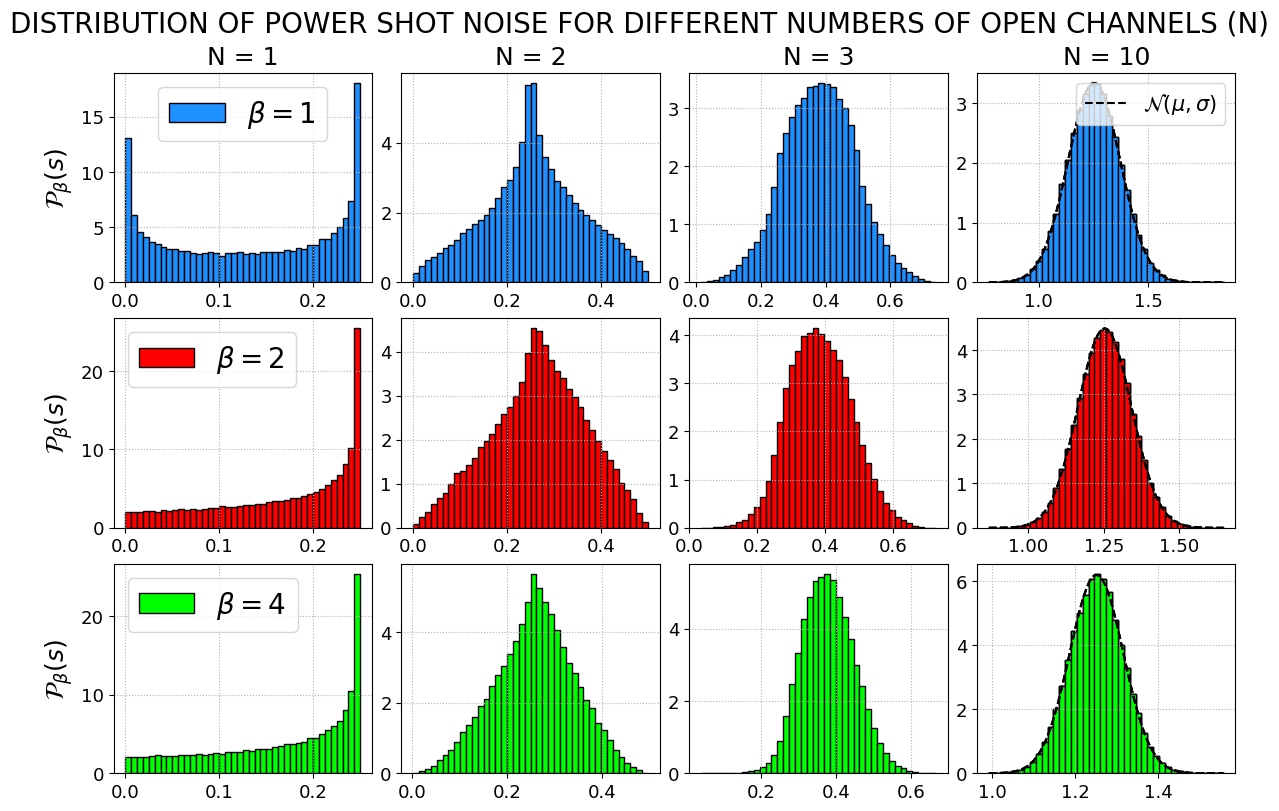

In [8]:
fig, axs = plt.subplots(3,4, figsize = (12,8), constrained_layout = True, facecolor = 'w')

fig.suptitle(r'DISTRIBUTION OF POWER SHOT NOISE FOR DIFFERENT NUMBERS OF OPEN CHANNELS (N)', fontsize = 20)

for j in range(0,4):
    for i in range(0,3):
        
        axs[i,j].tick_params(axis='both', which = 'major', labelsize = 13)
        
        if (j == 3):
            
            axs[0,3].set_title('N = 10', fontsize = 18) 
            
            axs[0,3].hist(P_O[:,9], bins = 40, color='dodgerblue', alpha=1, density = True, histtype='bar', ec='black');
            axs[1,3].hist(P_U[:,9], bins = 40, color='red', alpha=1, density = True, histtype='bar', ec='black');
            axs[2,3].hist(P_S[:,9], bins = 40, color='lime', alpha=1, density = True, histtype='bar', ec='black');
            
            x = np.linspace(np.min(P_O[:,9]), np.max(P_O[:,9]), 100)
            axs[0,3].plot(x,Gaussian(P_O[:,9]), color = 'black', label = r'$\mathcal{N}(\mu,\sigma)$', alpha = 1, linewidth = 1.5, linestyle = 'dashed')
            
            x = np.linspace(np.min(P_U[:,9]), np.max(P_U[:,9]), 100)
            axs[1,3].plot(x,Gaussian(P_U[:,9]), color = 'black', alpha = 1, linewidth = 1.5, linestyle = 'dashed')

            x = np.linspace(np.min(P_S[:,9]), np.max(P_S[:,9]), 100)
            axs[2,3].plot(x,Gaussian(P_S[:,9]), color = 'black', alpha = 1, linewidth = 1.5, linestyle = 'dashed')
            
        else:
            axs[0,j].set_title('N = '+ str(j+1), fontsize = 18)
            if (i == 0):
                axs[i,j].hist(P_O[:,j], bins = 40, color='dodgerblue', label = r'$\beta = 1$', alpha=1, density = True, histtype='bar', ec='black');
            else:
                if (i == 1):
                    axs[i,j].hist(P_U[:,j], bins = 40, color='red', label = r'$\beta = 2$', alpha=1, density = True, histtype='bar', ec='black');
                else:
                    if (i == 2):
                        axs[i,j].hist(P_S[:,j], bins = 40, color='lime', label = r'$\beta = 4$', alpha=1, density = True, histtype='bar', ec='black');
        
        if (j == 0):
            axs[i,0].set_ylabel(r'$\mathcal{P}_{\beta}(s)$', fontsize = 18)
            axs[i,0].legend(fontsize = 20)
            
        if (j == 3 and i == 0):
            axs[0,3].legend(fontsize = 15, loc = "upper right")
        
        axs[i,j].grid(linestyle=':')

In [9]:
meanG_O = np.mean(G_O, axis = 0)
meanG_U = np.mean(G_U, axis = 0)
meanG_S = np.mean(G_S, axis = 0)

varG_O = np.var(G_O, axis = 0)
varG_U = np.var(G_U, axis = 0)
varG_S = np.var(G_S, axis = 0)

meanP_O = np.mean(P_O, axis = 0)
meanP_U = np.mean(P_U, axis = 0)
meanP_S = np.mean(P_S, axis = 0)

varP_O = np.var(P_O, axis = 0)
varP_U = np.var(P_U, axis = 0)
varP_S = np.var(P_S, axis = 0)

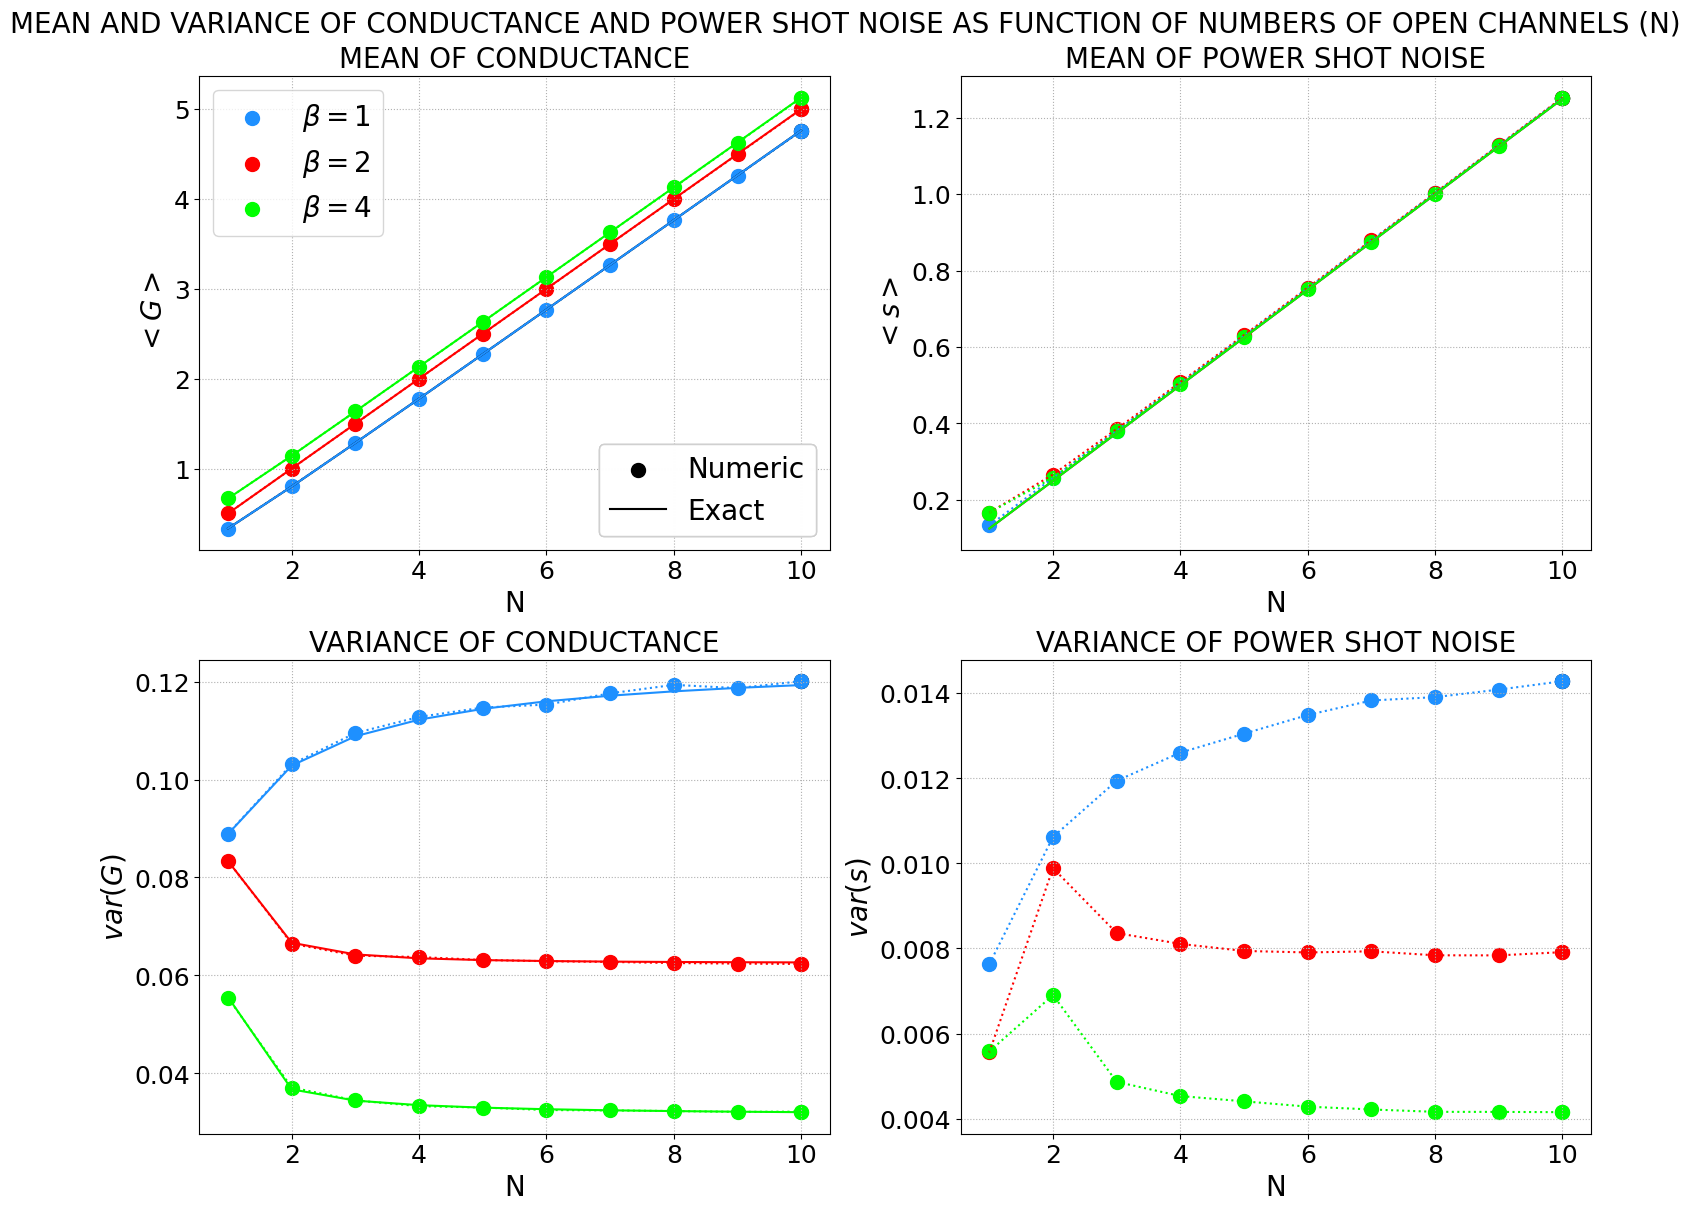

In [10]:
N1 = [i for i in range(1,11)]
N2 = N1
NT = N1+N2

meanG_O_aux = np.empty(10, dtype = float)
meanG_U_aux = np.empty(10, dtype = float)
meanG_S_aux = np.empty(10, dtype = float)

varG_O_aux = np.empty(10, dtype = float)
varG_U_aux = np.empty(10, dtype = float)
varG_S_aux = np.empty(10, dtype = float)

meanP_O_aux = np.empty(10, dtype = float)
meanP_U_aux = np.empty(10, dtype = float)
meanP_S_aux = np.empty(10, dtype = float)

for N1 in range(1,11):
    
    N2 = N1
    NT = N1 + N2

    meanG_O_aux[N1-1] = (N1*N2)/(NT-1+(2/1))
    meanG_U_aux[N1-1] = (N1*N2)/(NT-1+(2/2))
    meanG_S_aux[N1-1] = (N1*N2)/(NT-1+(2/4))
    
    meanP_O_aux[N1-1] = ((N1**2)*(N2**2))/((N1+N2)**3) - (1-(2/1))*(N1*N2*(N1-N2)**2)/((N1+N2)**4)
    meanP_U_aux[N1-1] = ((N1**2)*(N2**2))/((N1+N2)**3) - (1-(2/2))*(N1*N2*(N1-N2)**2)/((N1+N2)**4)
    meanP_S_aux[N1-1] = ((N1**2)*(N2**2))/((N1+N2)**3) - (1-(2/4))*(N1*N2*(N1-N2)**2)/((N1+N2)**4)
    
    varG_O_aux[N1-1] = 2*N1*N2*(N1-1+2)*(N2-1+2)/((NT-1+4)*(NT-2+2)*((NT-1+2)**2))
    varG_U_aux[N1-1] = 2*N1*N2*(N1-1+1)*(N2-1+1)/(2*(NT-1+2)*(NT-2+1)*((NT-1+1)**2))
    varG_S_aux[N1-1] = 2*N1*N2*(N1-1+(2/4))*(N2-1+(2/4))/(4*(NT-1+(4/4))*(NT-2+(2/4))*((NT-1+(2/4))**2))

fig, axs = plt.subplots(2,2, figsize = (15,12), constrained_layout = True)

fig.suptitle(r'MEAN AND VARIANCE OF CONDUCTANCE AND POWER SHOT NOISE AS FUNCTION OF NUMBERS OF OPEN CHANNELS (N)', fontsize = 20)

for i in range(0,2):
    for j in range(0,2):
        
        if (i == 0) and (j == 0):
            axs[0,0].set_title('MEAN OF CONDUCTANCE', fontsize = 20)
            axs[0,0].set_ylabel(r'$<G>$', fontsize = 20)
            
            variable_O = meanG_O; variable_U = meanG_U; variable_S = meanG_S
            
        else:
            if (i == 1) and (j == 0):
  
                axs[1,0].set_title('VARIANCE OF CONDUCTANCE', fontsize = 20)
                axs[1,0].set_ylabel(r'$var(G)$', fontsize = 20)
            
                variable_O = varG_O; variable_U = varG_U; variable_S = varG_S
            
            else:
                if (i == 0) and (j == 1):
                    
                    axs[0,1].set_title('MEAN OF POWER SHOT NOISE', fontsize = 20)
                    axs[0,1].set_ylabel(r'$<s>$', fontsize = 20)
                    
                    variable_O = meanP_O; variable_U = meanP_U; variable_S = meanP_S
                    
                else:
                    if (i == 1) and (j == 1):
                        axs[1,1].set_title('VARIANCE OF POWER SHOT NOISE', fontsize = 20)
                        axs[1,1].set_ylabel(r'$var(s)$', fontsize = 20)

                        variable_O = varP_O; variable_U = varP_U; variable_S = varP_S 
        
        
        for k in range(0,len(meanG_O)):
            axs[i,j].scatter((k+1), variable_O[k], s = 100, color = 'dodgerblue', alpha = 1)
            axs[i,j].scatter((k+1), variable_U[k], s = 100, color = 'red', alpha = 1)
            axs[i,j].scatter((k+1), variable_S[k], s = 100, color = 'lime', alpha = 1)
            
            if k == (len(meanG_O)-1):
                Numeric_scatter = axs[i,j].scatter((k+1), variable_O[k], label = 'Numeric', s = 100, color = 'black', alpha = 1)
                beta_1 = axs[i,j].scatter((k+1), variable_O[k], label = r'$\beta = 1$', s = 100, color = 'dodgerblue', alpha = 1)
                beta_2 = axs[i,j].scatter((k+1), variable_U[k], label = r'$\beta = 2$', s = 100, color = 'red', alpha = 1)
                beta_4 = axs[i,j].scatter((k+1), variable_S[k], label = r'$\beta = 4$', s = 100, color = 'lime', alpha = 1)

        axs[i,j].plot([i for i in range(1,11)], variable_O, color = 'dodgerblue', linestyle = ':')
        axs[i,j].plot([i for i in range(1,11)], variable_U, color = 'red', linestyle = ':')
        axs[i,j].plot([i for i in range(1,11)], variable_S, color = 'lime', linestyle = ':')
        
        if (i == 0 and j == 0):
            Exact_plot, = axs[0,0].plot([i for i in range(1,11)], meanG_O_aux, label = 'Exact', color = 'black', linestyle = '-')
            axs[0,0].plot([i for i in range(1,11)], meanG_O_aux, color = 'dodgerblue', linestyle = '-')
            axs[0,0].plot([i for i in range(1,11)], meanG_U_aux, color = 'red', linestyle = '-')
            axs[0,0].plot([i for i in range(1,11)], meanG_S_aux, color = 'lime', linestyle = '-')
            
        if (i == 0 and j == 1):
            axs[0,1].plot([i for i in range(1,11)], meanP_O_aux, color = 'dodgerblue', linestyle = '-')
            axs[0,1].plot([i for i in range(1,11)], meanP_U_aux, color = 'red', linestyle = '-')
            axs[0,1].plot([i for i in range(1,11)], meanP_S_aux, color = 'lime', linestyle = '-')
        
        if (i == 1 and j == 0):
            axs[1,0].plot([i for i in range(1,11)], varG_O_aux , color = 'dodgerblue', linestyle = '-')
            axs[1,0].plot([i for i in range(1,11)], varG_U_aux, color = 'red', linestyle = '-')
            axs[1,0].plot([i for i in range(1,11)], varG_S_aux, color = 'lime', linestyle = '-')

        axs[i,j].grid(linestyle=':')
        first_legend = axs[0,0].legend([Numeric_scatter, Exact_plot], ["Numeric","Exact"], loc = "lower right", fontsize = 20)
        axs[0,0].add_artist(first_legend)
        axs[0,0].legend([beta_1, beta_2, beta_4], [r'$\beta = 1$', r'$\beta = 2$', r'$\beta = 4$'], loc = "upper left", fontsize = 20)

        axs[i,j].set_xlabel('N', fontsize = 20)
        axs[i,j].tick_params(axis = 'both', which = 'major', labelsize = 18)
        

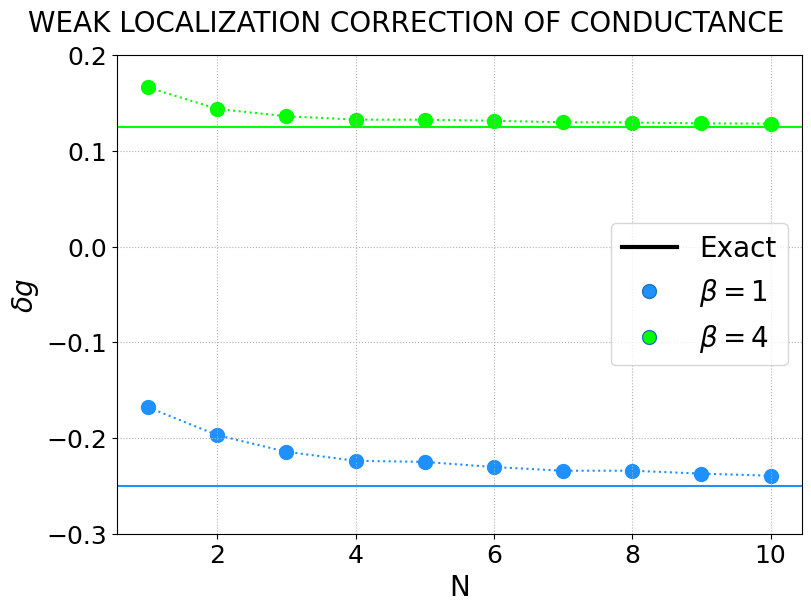

In [11]:
fig, axs = plt.subplots(1,1, figsize = (8,6), constrained_layout = True)

fig.suptitle(r'WEAK LOCALIZATION CORRECTION OF CONDUCTANCE', fontsize = 20)


axs.plot([i for i in range(1,11)], (meanG_S - meanG_U), color = 'lime', linestyle = ':', alpha = 1)
axs.plot([i for i in range(1,11)], (meanG_O - meanG_U), color = 'dodgerblue', linestyle = ':', alpha = 1)


axs.scatter([i for i in range(1,11)], (meanG_S - meanG_U), label = r'$\beta = 4$' , s = 100, color = 'lime', alpha = 1)
axs.scatter([i for i in range(1,11)], (meanG_O - meanG_U), label = r'$\beta = 1$', s = 100, color = 'dodgerblue', alpha = 1)

axs.set_xlabel('N', fontsize = 20)
axs.tick_params(axis = 'both', which = 'major', labelsize = 18)
axs.set_ylabel(r'$\delta g$', fontsize = 20)
axs.grid(linestyle=':')
axs.legend(loc = "lower left", fontsize = 20)

axs.axhline(y=(1/4)*(1-(2/1)), color='dodgerblue', linestyle='-')
axs.axhline(y=(1/4)*(1-(2/4)), color='lime', linestyle='-')

axs.set_ylim([-0.3, 0.2])

point_beta1 = Line2D([0], [0], label=r'$\beta = 1$', marker = 'o', markersize=10, markerfacecolor='dodgerblue', linestyle='')
point_beta4 = Line2D([0], [0], label=r'$\beta = 4$', marker = 'o', markersize=10, markerfacecolor='lime', linestyle='')
exact_line = Line2D([0], [0], color='black', label='Exact', linewidth = '3')
plt.legend(handles=[exact_line, point_beta1, point_beta4], fontsize = 20)

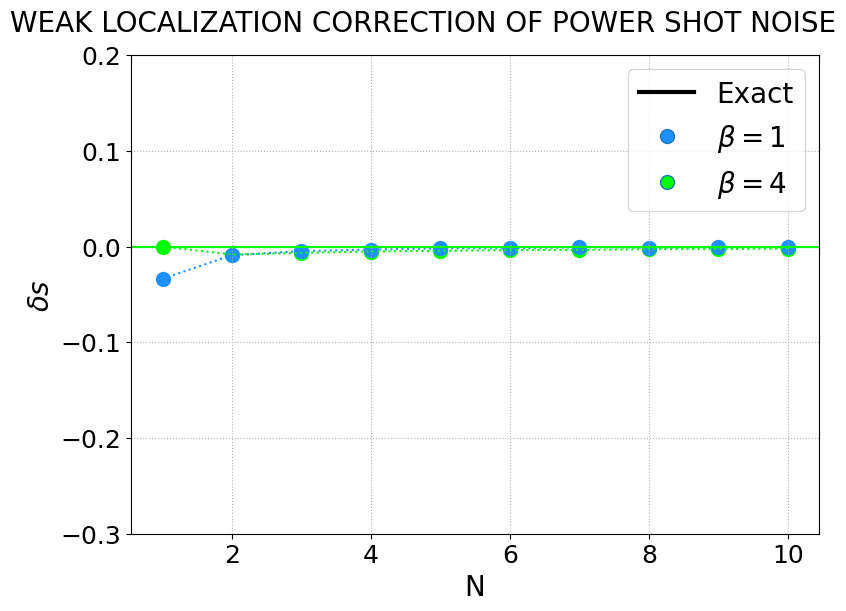

In [12]:
fig, axs = plt.subplots(1,1, figsize = (8,6), constrained_layout = True)

fig.suptitle(r'WEAK LOCALIZATION CORRECTION OF POWER SHOT NOISE', fontsize = 20)


axs.plot([i for i in range(1,11)], (meanP_S - meanP_U), color = 'lime', linestyle = ':', alpha = 1)
axs.plot([i for i in range(1,11)], (meanP_O - meanP_U), color = 'dodgerblue', linestyle = ':', alpha = 1)


axs.scatter([i for i in range(1,11)], (meanP_S - meanP_U), label = r'$\beta = 4$' , s = 100, color = 'lime', alpha = 1)
axs.scatter([i for i in range(1,11)], (meanP_O - meanP_U), label = r'$\beta = 1$', s = 100, color = 'dodgerblue', alpha = 1)

axs.set_xlabel('N', fontsize = 20)
axs.tick_params(axis = 'both', which = 'major', labelsize = 18)
axs.set_ylabel(r'$\delta s$', fontsize = 20)
axs.grid(linestyle=':')
axs.legend(loc = "lower left", fontsize = 20)

axs.axhline(y=0, color='dodgerblue', linestyle='-')
axs.axhline(y=0, color='lime', linestyle='-')

axs.set_ylim([-0.3, 0.2])

point_beta1 = Line2D([0], [0], label=r'$\beta = 1$', marker = 'o', markersize=10, markerfacecolor='dodgerblue', linestyle='')
point_beta4 = Line2D([0], [0], label=r'$\beta = 4$', marker = 'o', markersize=10, markerfacecolor='lime', linestyle='')
exact_line = Line2D([0], [0], color='black', label='Exact', linewidth = '3')
plt.legend(handles=[exact_line, point_beta1, point_beta4], fontsize = 20)

In [13]:
df_G_O_Gamma_N1 = pd.read_csv(r'Gamma/G_O_Gamma_N1.txt', sep='\t', header = None)
df_G_U_Gamma_N1 = pd.read_csv(r'Gamma/G_U_Gamma_N1.txt', sep='\t', header = None)
df_G_S_Gamma_N1 = pd.read_csv(r'Gamma/G_S_Gamma_N1.txt', sep='\t', header = None)

df_G_O_Gamma_N2 = pd.read_csv(r'Gamma/G_O_Gamma_N2.txt', sep='\t', header = None)
df_G_U_Gamma_N2 = pd.read_csv(r'Gamma/G_U_Gamma_N2.txt', sep='\t', header = None)
df_G_S_Gamma_N2 = pd.read_csv(r'Gamma/G_S_Gamma_N2.txt', sep='\t', header = None)

df_G_O_Gamma_N3 = pd.read_csv(r'Gamma/G_O_Gamma_N3.txt', sep='\t', header = None)
df_G_U_Gamma_N3 = pd.read_csv(r'Gamma/G_U_Gamma_N3.txt', sep='\t', header = None)
df_G_S_Gamma_N3 = pd.read_csv(r'Gamma/G_S_Gamma_N3.txt', sep='\t', header = None)

df_G_O_Gamma_N10 = pd.read_csv(r'Gamma/G_O_Gamma_N10.txt', sep='\t', header = None)
df_G_U_Gamma_N10 = pd.read_csv(r'Gamma/G_U_Gamma_N10.txt', sep='\t', header = None)
df_G_S_Gamma_N10 = pd.read_csv(r'Gamma/G_S_Gamma_N10.txt', sep='\t', header = None)

G_O_Gamma_N1 = df_G_O_Gamma_N1.values
G_U_Gamma_N1 = df_G_U_Gamma_N1.values
G_S_Gamma_N1 = (df_G_S_Gamma_N1.values)/2

G_O_Gamma_N2 = df_G_O_Gamma_N2.values
G_U_Gamma_N2 = df_G_U_Gamma_N2.values
G_S_Gamma_N2 = (df_G_S_Gamma_N2.values)/2

G_O_Gamma_N3 = df_G_O_Gamma_N3.values
G_U_Gamma_N3 = df_G_U_Gamma_N3.values
G_S_Gamma_N3 = (df_G_S_Gamma_N3.values)/2

G_O_Gamma_N10 = df_G_O_Gamma_N10.values
G_U_Gamma_N10 = df_G_U_Gamma_N10.values
G_S_Gamma_N10 = (df_G_S_Gamma_N10.values)/2


In [14]:
df_G_U_Gamma_N1

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.130310e-09,0.012103,0.003656,0.002402,0.002297,0.050652,0.096113,0.012410,0.178270,0.170867,...,0.094834,0.635496,0.199317,0.917019,0.279513,0.766853,0.779579,0.660636,0.772232,0.709047
1,9.018950e-09,0.000013,0.000763,0.261364,0.034801,0.043507,0.070650,0.116163,0.740016,0.203420,...,0.018492,0.114269,0.224861,0.004816,0.266012,0.640045,0.094493,0.329411,0.006392,0.079807
2,2.491240e-09,0.000488,0.001034,0.000379,0.003267,0.022394,0.003727,0.001731,0.715197,0.087054,...,0.119312,0.186358,0.016528,0.278150,0.431416,0.082667,0.249780,0.265725,0.182229,0.010771
3,4.852110e-11,0.004485,0.001401,0.362808,0.103186,0.001374,0.088098,0.015540,0.100216,0.952922,...,0.090461,0.504204,0.035805,0.297839,0.216917,0.830160,0.041529,0.381740,0.333067,0.222641
4,4.917430e-10,0.040681,0.026865,0.000983,0.070265,0.012563,0.233048,0.568964,0.107102,0.201858,...,0.042197,0.857963,0.228605,0.070423,0.014922,0.014406,0.079244,0.279471,0.615806,0.982625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,7.085120e-09,0.000853,0.047775,0.017563,0.000603,0.016692,0.500662,0.930922,0.047921,0.016387,...,0.287908,0.159546,0.143138,0.207148,0.200058,0.077467,0.345763,0.026378,0.119458,0.796789
999996,4.889110e-08,0.000512,0.006457,0.006678,0.013635,0.002379,0.002814,0.012563,0.045336,0.236742,...,0.160307,0.105718,0.104778,0.017875,0.500596,0.153200,0.510398,0.222931,0.425018,0.477177
999997,9.218950e-09,0.000607,0.004423,0.003892,0.004831,0.008487,0.081245,0.013515,0.005079,0.279711,...,0.067082,0.095342,0.119651,0.117440,0.308287,0.009535,0.738105,0.591291,0.751197,0.397303
999998,8.712150e-10,0.006133,0.004318,0.002614,0.027292,0.062101,0.018926,0.114343,0.767092,0.004394,...,0.653049,0.229936,0.103071,0.098622,0.079370,0.272769,0.889611,0.005180,0.367026,0.800291


In [15]:
meanG_O_1 = np.mean(G_O_Gamma_N1, axis = 0)
meanG_U_1 = np.mean(G_U_Gamma_N1, axis = 0)
meanG_S_1 = np.mean(G_S_Gamma_N1, axis = 0)

meanG_O_2 = np.mean(G_O_Gamma_N2, axis = 0)
meanG_U_2 = np.mean(G_U_Gamma_N2, axis = 0)
meanG_S_2 = np.mean(G_S_Gamma_N2, axis = 0)

meanG_O_3 = np.mean(G_O_Gamma_N3, axis = 0)
meanG_U_3 = np.mean(G_U_Gamma_N3, axis = 0)
meanG_S_3 = np.mean(G_S_Gamma_N3, axis = 0)

meanG_O_10 = np.mean(G_O_Gamma_N10, axis = 0)
meanG_U_10 = np.mean(G_U_Gamma_N10, axis = 0)
meanG_S_10 = np.mean(G_S_Gamma_N10, axis = 0)

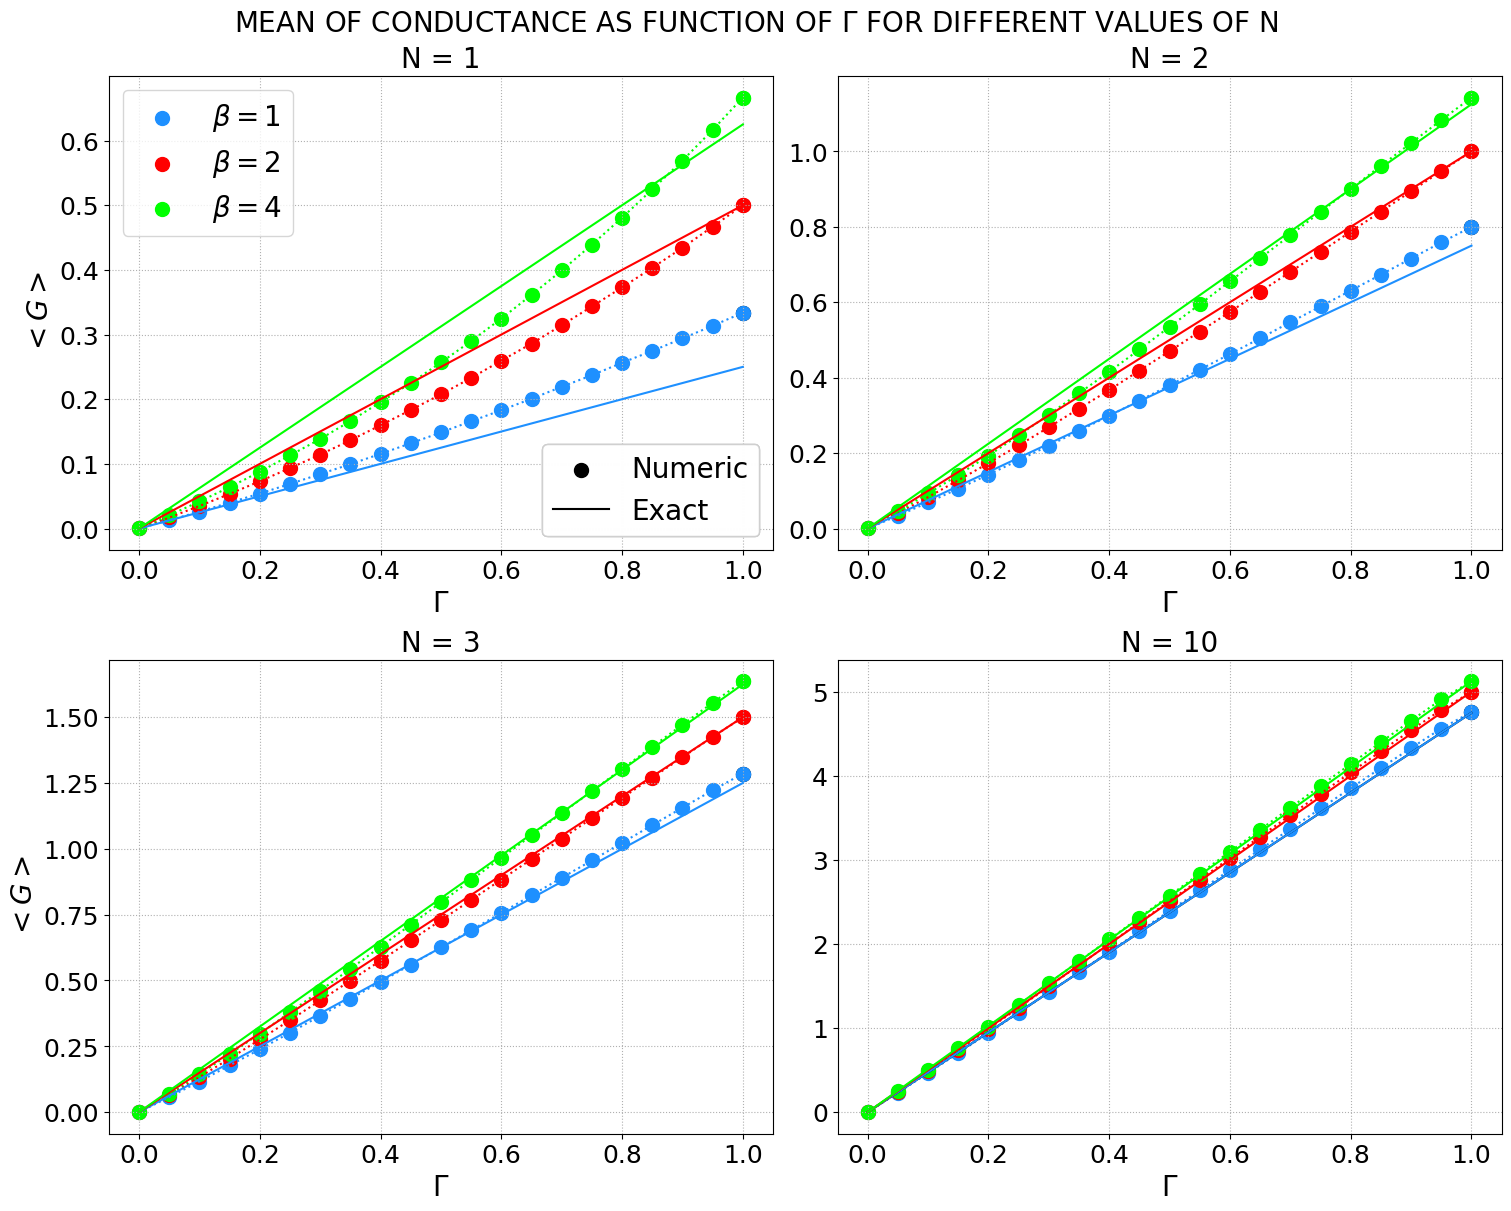

In [16]:
fig, axs = plt.subplots(2,2, figsize = (15,12), constrained_layout = True, facecolor = 'w')

fig.suptitle(r'MEAN OF CONDUCTANCE AS FUNCTION OF $\Gamma$ FOR DIFFERENT VALUES OF N', fontsize = 20)

N = 1

for i in range(0,2):
    for j in range(0,2):
        
        if (i == 0) and (j == 0):
            axs[0,0].set_title('N = 1', fontsize = 20)
            axs[0,0].set_ylabel(r'$<G>$', fontsize = 20)
            
            variable_O = meanG_O_1; variable_U = meanG_U_1; variable_S = meanG_S_1
            
        else:
            if (i == 1) and (j == 0):
  
                axs[1,0].set_title('N = 3', fontsize = 20)
                axs[1,0].set_ylabel(r'$<G>$', fontsize = 20)
            
                variable_O = meanG_O_3; variable_U = meanG_U_3; variable_S = meanG_S_3
            
            else:
                if (i == 0) and (j == 1):
                    
                    axs[0,1].set_title('N = 2', fontsize = 20)
                    
                    variable_O = meanG_O_2; variable_U = meanG_U_2; variable_S = meanG_S_2
                    
                else:
                    if (i == 1) and (j == 1):
                        axs[1,1].set_title('N = 10', fontsize = 20)

                        variable_O = meanG_O_10; variable_U = meanG_U_10; variable_S = meanG_S_10 
        
        for k in range(0,len(meanG_O_1)):
            axs[i,j].scatter((k)/20, variable_O[k], s = 100, color = 'dodgerblue', alpha = 1)
            axs[i,j].scatter((k)/20, variable_U[k], s = 100, color = 'red', alpha = 1)
            axs[i,j].scatter((k)/20, variable_S[k], s = 100, color = 'lime', alpha = 1)
            
            if k == (len(meanG_O_1)-1):
                Numeric_scatter = axs[i,j].scatter((k)/20, variable_O[k], label = 'Numeric', s = 100, color = 'black', alpha = 1)
                beta_1 = axs[i,j].scatter((k)/20, variable_O[k], label = r'$\beta = 1$', s = 100, color = 'dodgerblue', alpha = 1)
                beta_2 = axs[i,j].scatter((k)/20, variable_U[k], label = r'$\beta = 2$', s = 100, color = 'red', alpha = 1)
                beta_4 = axs[i,j].scatter((k)/20, variable_S[k], label = r'$\beta = 4$', s = 100, color = 'lime', alpha = 1)

        axs[i,j].plot([i/20 for i in range(0,21)], variable_O, color = 'dodgerblue', linestyle = ':')
        axs[i,j].plot([i/20 for i in range(0,21)], variable_U, color = 'red', linestyle = ':')
        axs[i,j].plot([i/20 for i in range(0,21)], variable_S, color = 'lime', linestyle = ':')
        
        if (i == 1 and j == 1):
            N = 10
            Exact_plot, = axs[1,1].plot([i/20 for i in range(0,21)], [((N/2)+(1/4)*(1-2/1))*(i/20) for i in range(0,21)], label = 'Exact', color = 'black', linestyle = '-')
    
        axs[i,j].plot([i/20 for i in range(0,21)], [((N/2)+(1/4)*(1-2/1))*(i/20) for i in range(0,21)], color = 'dodgerblue')
        axs[i,j].plot([i/20 for i in range(0,21)], [((N/2)+(1/4)*(1-2/2))*(i/20) for i in range(0,21)], color = 'red')
        axs[i,j].plot([i/20 for i in range(0,21)], [((N/2)+(1/4)*(1-2/4))*(i/20) for i in range(0,21)], color = 'lime')
        
        axs[i,j].grid(linestyle=':')
        
        first_legend = axs[0,0].legend([Numeric_scatter, Exact_plot], ["Numeric","Exact"], loc = "lower right", fontsize = 20)
        axs[0,0].add_artist(first_legend)
        axs[0,0].legend([beta_1, beta_2, beta_4], [r'$\beta = 1$', r'$\beta = 2$', r'$\beta = 4$'], loc = "upper left", fontsize = 20)

        axs[i,j].set_xlabel(r'$\Gamma$', fontsize = 20)
        axs[i,j].tick_params(axis = 'both', which = 'major', labelsize = 18)
        N = N + 1

In [17]:
df_P_O_Gamma_N1 = pd.read_csv(r'Gamma/P_O_Gamma_N1.txt', sep='\t', header = None)
df_P_U_Gamma_N1 = pd.read_csv(r'Gamma/P_U_Gamma_N1.txt', sep='\t', header = None)
df_P_S_Gamma_N1 = pd.read_csv(r'Gamma/P_S_Gamma_N1.txt', sep='\t', header = None)

df_P_O_Gamma_N2 = pd.read_csv(r'Gamma/P_O_Gamma_N2.txt', sep='\t', header = None)
df_P_U_Gamma_N2 = pd.read_csv(r'Gamma/P_U_Gamma_N2.txt', sep='\t', header = None)
df_P_S_Gamma_N2 = pd.read_csv(r'Gamma/P_S_Gamma_N2.txt', sep='\t', header = None)

df_P_O_Gamma_N3 = pd.read_csv(r'Gamma/P_O_Gamma_N3.txt', sep='\t', header = None)
df_P_U_Gamma_N3 = pd.read_csv(r'Gamma/P_U_Gamma_N3.txt', sep='\t', header = None)
df_P_S_Gamma_N3 = pd.read_csv(r'Gamma/P_S_Gamma_N3.txt', sep='\t', header = None)

df_P_O_Gamma_N10 = pd.read_csv(r'Gamma/P_O_Gamma_N10.txt', sep='\t', header = None)
df_P_U_Gamma_N10 = pd.read_csv(r'Gamma/P_U_Gamma_N10.txt', sep='\t', header = None)
df_P_S_Gamma_N10 = pd.read_csv(r'Gamma/P_S_Gamma_N10.txt', sep='\t', header = None)

P_O_Gamma_N1 = df_P_O_Gamma_N1.values
P_U_Gamma_N1 = df_P_U_Gamma_N1.values
P_S_Gamma_N1 = (df_P_S_Gamma_N1.values)/2

P_O_Gamma_N2 = df_P_O_Gamma_N2.values
P_U_Gamma_N2 = df_P_U_Gamma_N2.values
P_S_Gamma_N2 = (df_P_S_Gamma_N2.values)/2

P_O_Gamma_N3 = df_P_O_Gamma_N3.values
P_U_Gamma_N3 = df_P_U_Gamma_N3.values
P_S_Gamma_N3 = (df_P_S_Gamma_N3.values)/2

P_O_Gamma_N10 = df_P_O_Gamma_N10.values
P_U_Gamma_N10 = df_P_U_Gamma_N10.values
P_S_Gamma_N10 = (df_P_S_Gamma_N10.values)/2


In [18]:
meanP_O_1 = np.mean(P_O_Gamma_N1, axis = 0)
meanP_U_1 = np.mean(P_U_Gamma_N1, axis = 0)
meanP_S_1 = np.mean(P_S_Gamma_N1, axis = 0)

meanP_O_2 = np.mean(P_O_Gamma_N2, axis = 0)
meanP_U_2 = np.mean(P_U_Gamma_N2, axis = 0)
meanP_S_2 = np.mean(P_S_Gamma_N2, axis = 0)

meanP_O_3 = np.mean(P_O_Gamma_N3, axis = 0)
meanP_U_3 = np.mean(P_U_Gamma_N3, axis = 0)
meanP_S_3 = np.mean(P_S_Gamma_N3, axis = 0)

meanP_O_10 = np.mean(P_O_Gamma_N10, axis = 0)
meanP_U_10 = np.mean(P_U_Gamma_N10, axis = 0)
meanP_S_10 = np.mean(P_S_Gamma_N10, axis = 0)

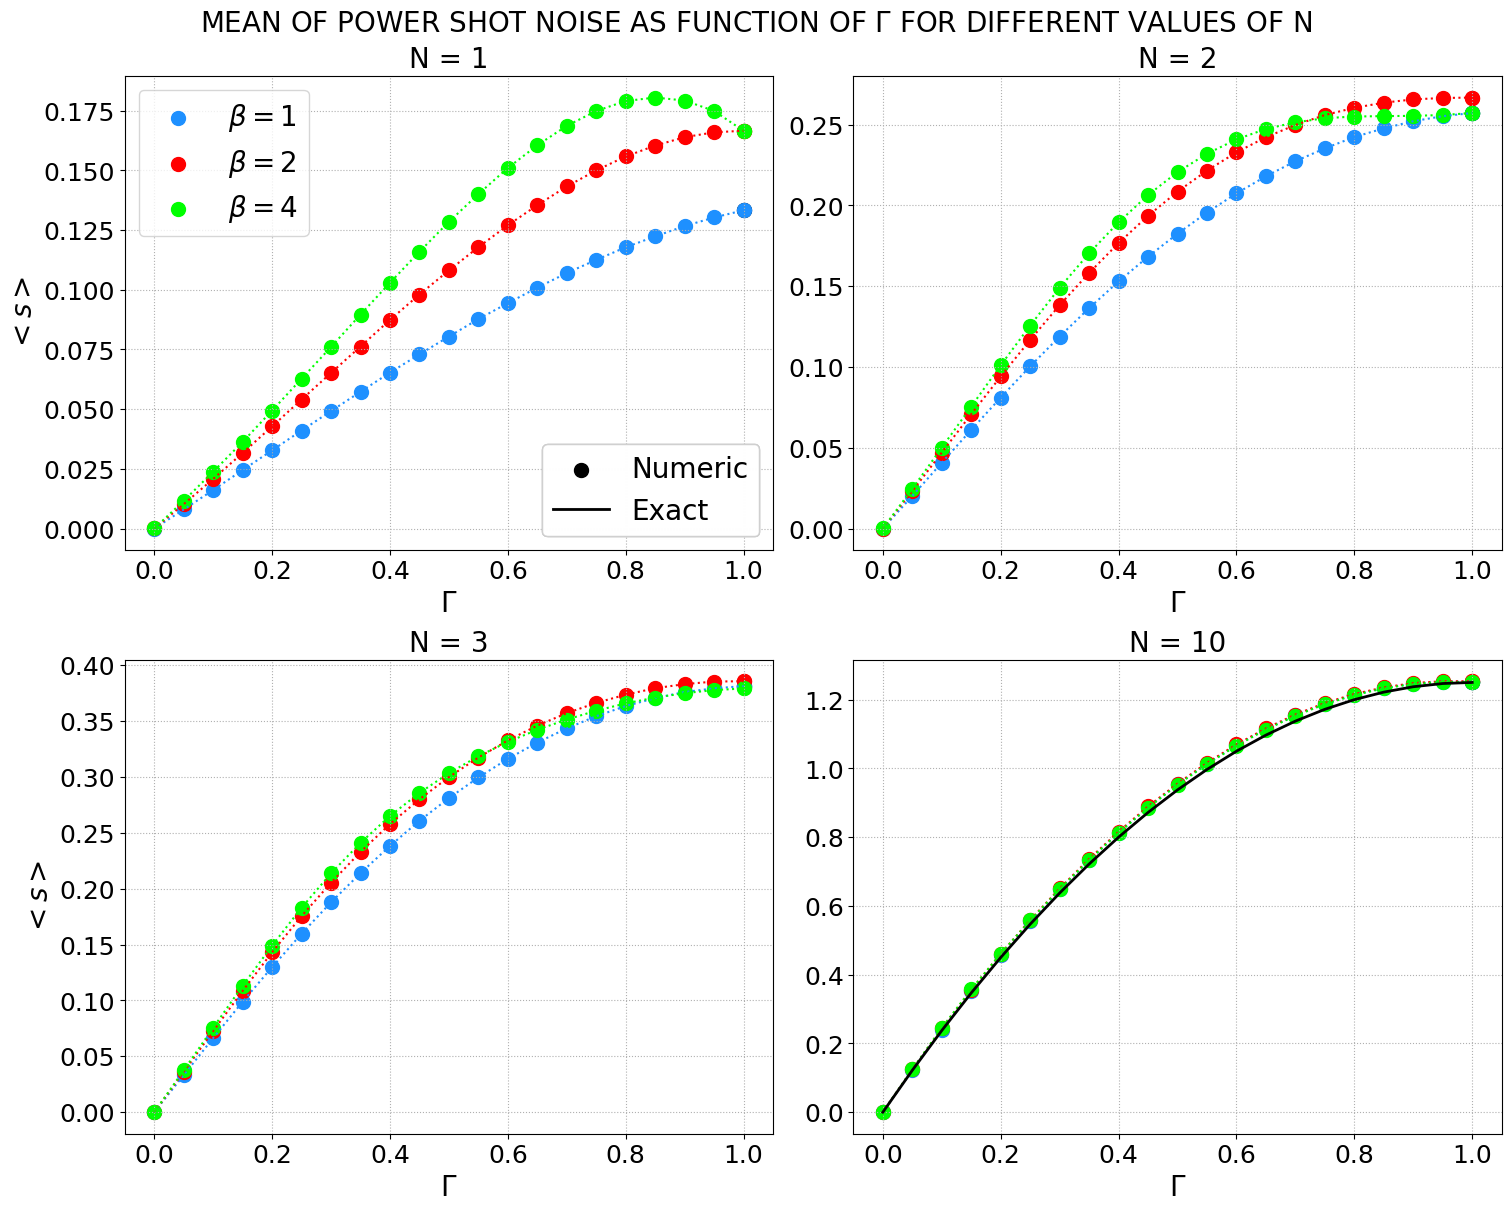

In [19]:
fig, axs = plt.subplots(2,2, figsize = (15,12), constrained_layout = True, facecolor = 'w')

fig.suptitle(r'MEAN OF POWER SHOT NOISE AS FUNCTION OF $\Gamma$ FOR DIFFERENT VALUES OF N', fontsize = 20)

N = 1

for i in range(0,2):
    for j in range(0,2):
        
        if (i == 0) and (j == 0):
            axs[0,0].set_title('N = 1', fontsize = 20)
            axs[0,0].set_ylabel(r'$<s>$', fontsize = 20)
            
            variable_O = meanP_O_1; variable_U = meanP_U_1; variable_S = meanP_S_1
            
        else:
            if (i == 1) and (j == 0):
  
                axs[1,0].set_title('N = 3', fontsize = 20)
                axs[1,0].set_ylabel(r'$<s>$', fontsize = 20)
            
                variable_O = meanP_O_3; variable_U = meanP_U_3; variable_S = meanP_S_3
            
            else:
                if (i == 0) and (j == 1):
                    
                    axs[0,1].set_title('N = 2', fontsize = 20)
                    
                    variable_O = meanP_O_2; variable_U = meanP_U_2; variable_S = meanP_S_2
                    
                else:
                    if (i == 1) and (j == 1):
                        axs[1,1].set_title('N = 10', fontsize = 20)

                        variable_O = meanP_O_10; variable_U = meanP_U_10; variable_S = meanP_S_10 
        
        
        for k in range(0,len(meanG_O_1)):
            axs[i,j].scatter((k)/20, variable_O[k], s = 100, color = 'dodgerblue', alpha = 1)
            axs[i,j].scatter((k)/20, variable_U[k], s = 100, color = 'red', alpha = 1)
            axs[i,j].scatter((k)/20, variable_S[k], s = 100, color = 'lime', alpha = 1)
            
            if k == (len(meanG_O_1)-1):
                Numeric_scatter = axs[i,j].scatter((k)/20, variable_O[k], label = 'Numeric', s = 100, color = 'black', alpha = 1)
                beta_1 = axs[i,j].scatter((k)/20, variable_O[k], label = r'$\beta = 1$', s = 100, color = 'dodgerblue', alpha = 1)
                beta_2 = axs[i,j].scatter((k)/20, variable_U[k], label = r'$\beta = 2$', s = 100, color = 'red', alpha = 1)
                beta_4 = axs[i,j].scatter((k)/20, variable_S[k], label = r'$\beta = 4$', s = 100, color = 'lime', alpha = 1)

        axs[i,j].plot([i/20 for i in range(0,21)], variable_O, color = 'dodgerblue', linestyle = ':')
        axs[i,j].plot([i/20 for i in range(0,21)], variable_U, color = 'red', linestyle = ':')
        axs[i,j].plot([i/20 for i in range(0,21)], variable_S, color = 'lime', linestyle = ':')
        
        if (i == 1 and j == 1):
            N = 10
            Exact_plot, = axs[1,1].plot([i/20 for i in range(0,21)], [(N/8)*(i/20)*(2-(i/20)) for i in range(0,21)], label = 'Exact', color = 'black', linestyle = '-', linewidth = 2)

        axs[i,j].grid(linestyle=':')
        first_legend = axs[0,0].legend([Numeric_scatter, Exact_plot], ["Numeric","Exact"], loc = "lower right", fontsize = 20)
        axs[0,0].add_artist(first_legend)
        axs[0,0].legend([beta_1, beta_2, beta_4], [r'$\beta = 1$', r'$\beta = 2$', r'$\beta = 4$'], loc = "upper left", fontsize = 20)


        axs[i,j].set_xlabel(r'$\Gamma$', fontsize = 20)
        axs[i,j].tick_params(axis = 'both', which = 'major', labelsize = 18)
        
        N = N + 1
        

In [20]:
varG_O_1 = np.var(G_O_Gamma_N1, axis = 0)
varG_U_1 = np.var(G_U_Gamma_N1, axis = 0)
varG_S_1 = np.var(G_S_Gamma_N1, axis = 0)

varG_O_2 = np.var(G_O_Gamma_N2, axis = 0)
varG_U_2 = np.var(G_U_Gamma_N2, axis = 0)
varG_S_2 = np.var(G_S_Gamma_N2, axis = 0)

varG_O_3 = np.var(G_O_Gamma_N3, axis = 0)
varG_U_3 = np.var(G_U_Gamma_N3, axis = 0)
varG_S_3 = np.var(G_S_Gamma_N3, axis = 0)

varG_O_10 = np.var(G_O_Gamma_N10, axis = 0)
varG_U_10 = np.var(G_U_Gamma_N10, axis = 0)
varG_S_10 = np.var(G_S_Gamma_N10, axis = 0)

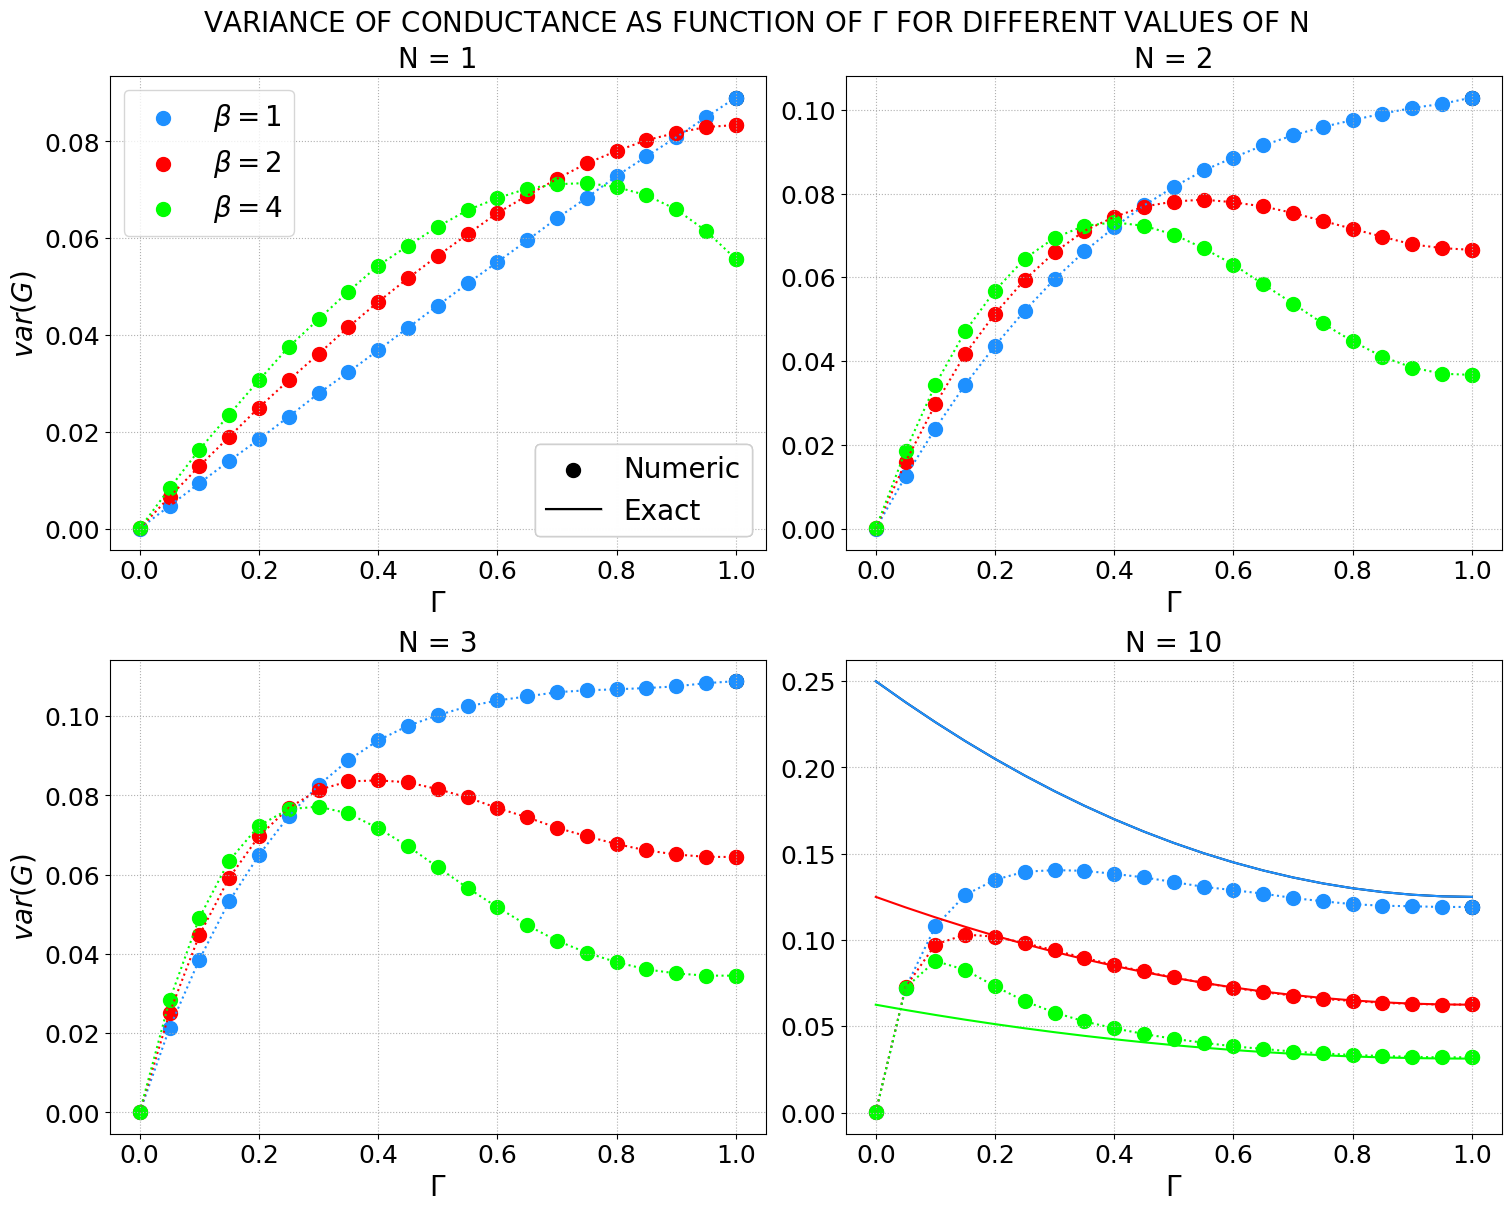

In [21]:
fig, axs = plt.subplots(2,2, figsize = (15,12), constrained_layout = True, facecolor = 'w')

fig.suptitle(r'VARIANCE OF CONDUCTANCE AS FUNCTION OF $\Gamma$ FOR DIFFERENT VALUES OF N', fontsize = 20)

N = 1

for i in range(0,2):
    for j in range(0,2):
        
        if (i == 0) and (j == 0):
            axs[0,0].set_title('N = 1', fontsize = 20)
            axs[0,0].set_ylabel(r'$var(G)$', fontsize = 20)
            
            variable_O = varG_O_1; variable_U = varG_U_1; variable_S = varG_S_1
            
        else:
            if (i == 1) and (j == 0):
  
                axs[1,0].set_title('N = 3', fontsize = 20)
                axs[1,0].set_ylabel(r'$var(G)$', fontsize = 20)
            
                variable_O = varG_O_3; variable_U = varG_U_3; variable_S = varG_S_3
            
            else:
                if (i == 0) and (j == 1):
                    
                    axs[0,1].set_title('N = 2', fontsize = 20)
                    
                    variable_O = varG_O_2; variable_U = varG_U_2; variable_S = varG_S_2
                    
                else:
                    if (i == 1) and (j == 1):
                        axs[1,1].set_title('N = 10', fontsize = 20)

                        variable_O = varG_O_10; variable_U = varG_U_10; variable_S = varG_S_10 
        
        
        for k in range(0,len(meanG_O_1)):
            axs[i,j].scatter((k)/20, variable_O[k], s = 100, color = 'dodgerblue', alpha = 1)
            axs[i,j].scatter((k)/20, variable_U[k], s = 100, color = 'red', alpha = 1)
            axs[i,j].scatter((k)/20, variable_S[k], s = 100, color = 'lime', alpha = 1)

            if k == (len(meanG_O_1)-1):
                Numeric_scatter = axs[i,j].scatter((k)/20, variable_O[k], label = 'Numeric', s = 100, color = 'black', alpha = 1)
                beta_1 = axs[i,j].scatter((k)/20, variable_O[k], label = r'$\beta = 1$', s = 100, color = 'dodgerblue', alpha = 1)
                beta_2 = axs[i,j].scatter((k)/20, variable_U[k], label = r'$\beta = 2$', s = 100, color = 'red', alpha = 1)
                beta_4 = axs[i,j].scatter((k)/20, variable_S[k], label = r'$\beta = 4$', s = 100, color = 'lime', alpha = 1)
  
        axs[i,j].plot([i/20 for i in range(0,21)], variable_O, label = r'$\beta = 1$', color = 'dodgerblue', linestyle = ':')
        axs[i,j].plot([i/20 for i in range(0,21)], variable_U, label = r'$\beta = 2$', color = 'red', linestyle = ':')
        axs[i,j].plot([i/20 for i in range(0,21)], variable_S, label = r'$\beta = 4$', color = 'lime', linestyle = ':')
        
        if (i == 1 and j == 1):
            N = 10
            Exact_plot, = axs[1,1].plot([i/20 for i in range(0,21)], [(1/8)*(1+(1-(i/20))**2) for i in range(0,21)], label = 'Exact', color = 'black', linestyle = '-', linewidth = 1.5)
            axs[1,1].plot([i/20 for i in range(0,21)], [(1/8)*(1+(1-(i/20))**2) for i in range(0,21)], label = 'Exact', color = 'dodgerblue', linestyle = '-', linewidth = 1.5)
            axs[1,1].plot([i/20 for i in range(0,21)], [(1/(8*2))*(1+(1-(i/20))**2) for i in range(0,21)], color = 'red', linestyle = '-', linewidth = 1.5)
            axs[1,1].plot([i/20 for i in range(0,21)], [(1/(8*4))*(1+(1-(i/20))**2) for i in range(0,21)], color = 'lime', linestyle = '-', linewidth = 1.5)
        
        axs[i,j].grid(linestyle=':')
        
        first_legend = axs[0,0].legend([Numeric_scatter, Exact_plot], ["Numeric","Exact"], loc = "lower right", fontsize = 20)
        axs[0,0].add_artist(first_legend)
        axs[0,0].legend([beta_1, beta_2, beta_4], [r'$\beta = 1$', r'$\beta = 2$', r'$\beta = 4$'], loc = "upper left", fontsize = 20)

        axs[i,j].set_xlabel(r'$\Gamma$', fontsize = 20)
        axs[i,j].tick_params(axis = 'both', which = 'major', labelsize = 18)
        
        N = N + 1

In [22]:
varP_O_1 = np.var(P_O_Gamma_N1, axis = 0)
varP_U_1 = np.var(P_U_Gamma_N1, axis = 0)
varP_S_1 = np.var(P_S_Gamma_N1, axis = 0)

varP_O_2 = np.var(P_O_Gamma_N2, axis = 0)
varP_U_2 = np.var(P_U_Gamma_N2, axis = 0)
varP_S_2 = np.var(P_S_Gamma_N2, axis = 0)

varP_O_3 = np.var(P_O_Gamma_N3, axis = 0)
varP_U_3 = np.var(P_U_Gamma_N3, axis = 0)
varP_S_3 = np.var(P_S_Gamma_N3, axis = 0)

varP_O_10 = np.var(P_O_Gamma_N10, axis = 0)
varP_U_10 = np.var(P_U_Gamma_N10, axis = 0)
varP_S_10 = np.var(P_S_Gamma_N10, axis = 0)

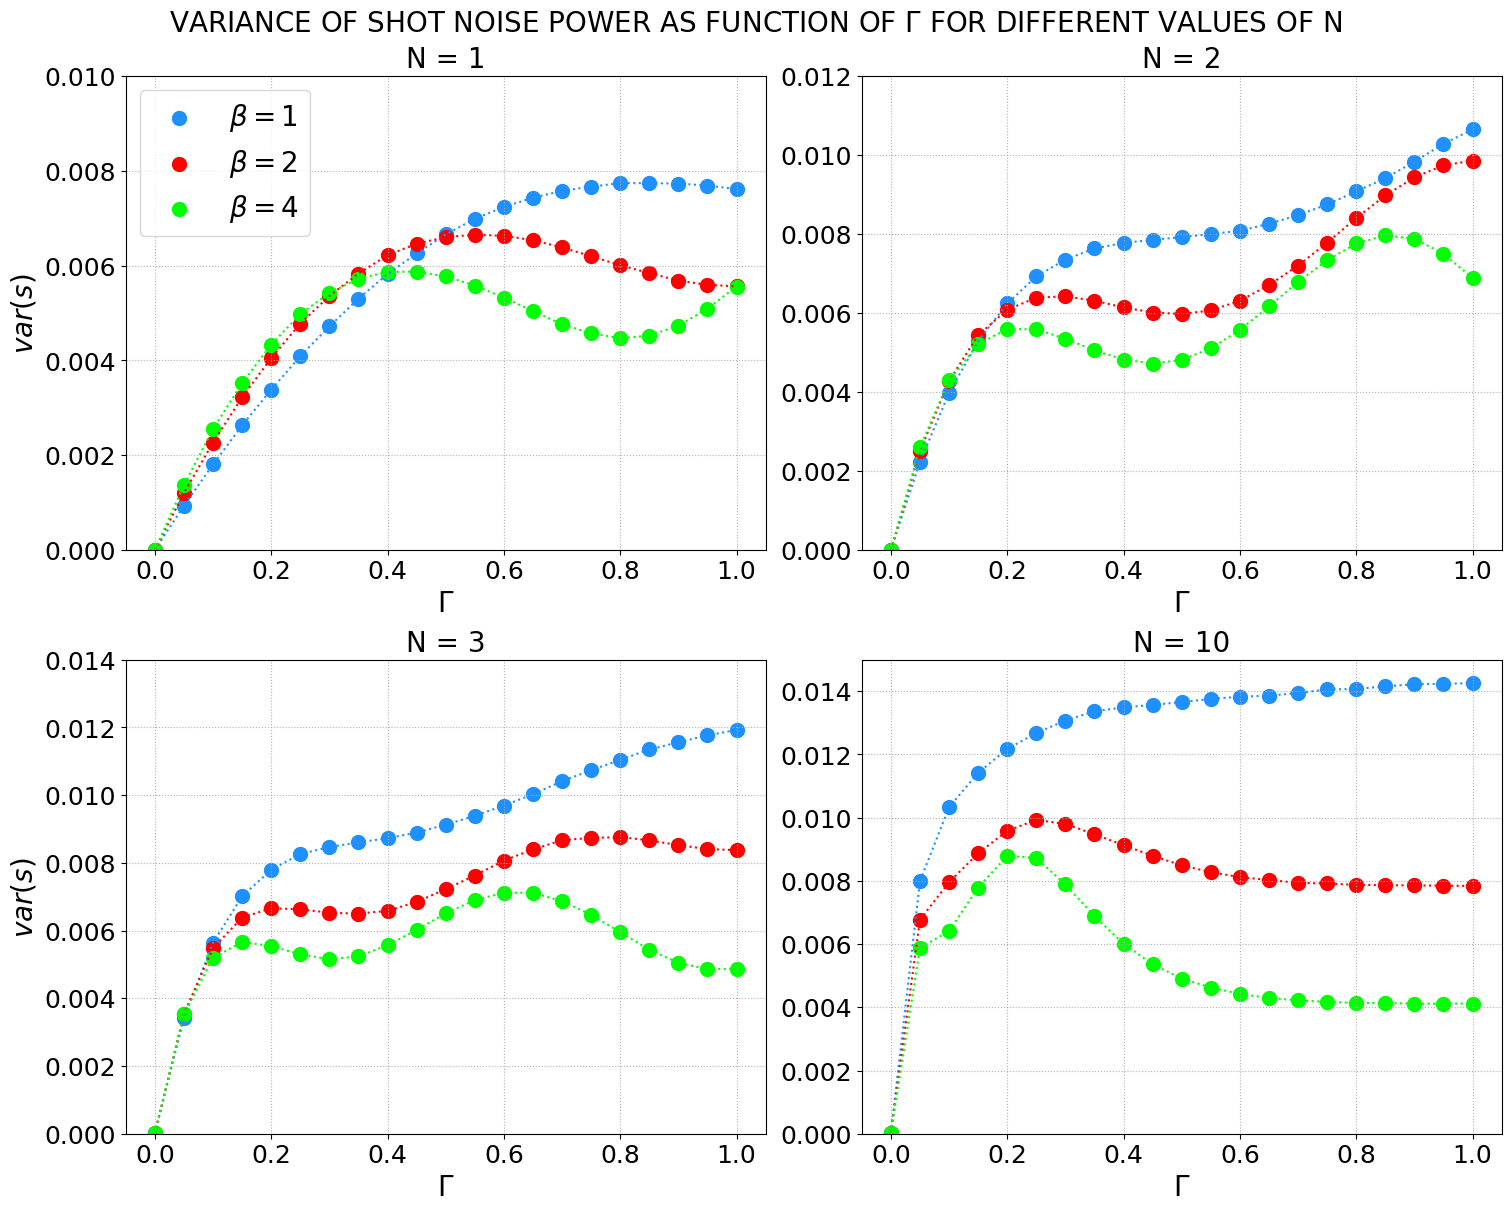

In [23]:
fig, axs = plt.subplots(2,2, figsize = (15,12), constrained_layout = True, facecolor = 'w')

fig.suptitle(r'VARIANCE OF SHOT NOISE POWER AS FUNCTION OF $\Gamma$ FOR DIFFERENT VALUES OF N', fontsize = 20)

for i in range(0,2):
    for j in range(0,2):
        
        if (i == 0) and (j == 0):
            axs[0,0].set_title('N = 1', fontsize = 20)
            axs[0,0].set_ylabel(r'$var(s)$', fontsize = 20)
            axs[0,0].set_ylim([0, 0.01])
            
            variable_O = varP_O_1; variable_U = varP_U_1; variable_S = varP_S_1
            
        else:
            if (i == 1) and (j == 0):
  
                axs[1,0].set_title('N = 3', fontsize = 20)
                axs[1,0].set_ylabel(r'$var(s)$', fontsize = 20)
                axs[1,0].set_ylim([0, 0.014])
            
                variable_O = varP_O_3; variable_U = varP_U_3; variable_S = varP_S_3
            
            else:
                if (i == 0) and (j == 1):
                    
                    axs[0,1].set_title('N = 2', fontsize = 20)
                    axs[0,1].set_ylim([0, 0.012])
                    
                    variable_O = varP_O_2; variable_U = varP_U_2; variable_S = varP_S_2
                    
                else:
                    if (i == 1) and (j == 1):
                        axs[1,1].set_title('N = 10', fontsize = 20)
                        axs[1,1].set_ylim([0, 0.015])

                        variable_O = varP_O_10; variable_U = varP_U_10; variable_S = varP_S_10 
        
        
        for k in range(0,len(meanG_O_1)):
            axs[i,j].scatter((k)/20, variable_O[k], s = 100, color = 'dodgerblue', alpha = 1)
            axs[i,j].scatter((k)/20, variable_U[k], s = 100, color = 'red', alpha = 1)
            axs[i,j].scatter((k)/20, variable_S[k], s = 100, color = 'lime', alpha = 1)

            if k == len(meanG_O_1-1):
                beta_1 = axs[i,j].scatter((k)/20, variable_O[k], s = 100, label = r'$\beta = 1$', color = 'dodgerblue', alpha = 1)
                beta_2 = axs[i,j].scatter((k)/20, variable_U[k], s = 100, label = r'$\beta = 2$', color = 'red', alpha = 1)
                beta_4 = axs[i,j].scatter((k)/20, variable_S[k], s = 100, label = r'$\beta = 4$', color = 'lime', alpha = 1)
            
        axs[i,j].plot([i/20 for i in range(0,21)], variable_O, color = 'dodgerblue', linestyle = ':')
        axs[i,j].plot([i/20 for i in range(0,21)], variable_U, color = 'red', linestyle = ':')
        axs[i,j].plot([i/20 for i in range(0,21)], variable_S, color = 'lime', linestyle = ':')
        
        axs[i,j].grid(linestyle=':')
        axs[0,0].legend([beta_1, beta_2, beta_4], [r'$\beta = 1$', r'$\beta = 2$', r'$\beta = 4$'], loc = "upper left", fontsize = 20)

        axs[i,j].set_xlabel(r'$\Gamma$', fontsize = 20)
        axs[i,j].tick_params(axis = 'both', which = 'major', labelsize = 18)

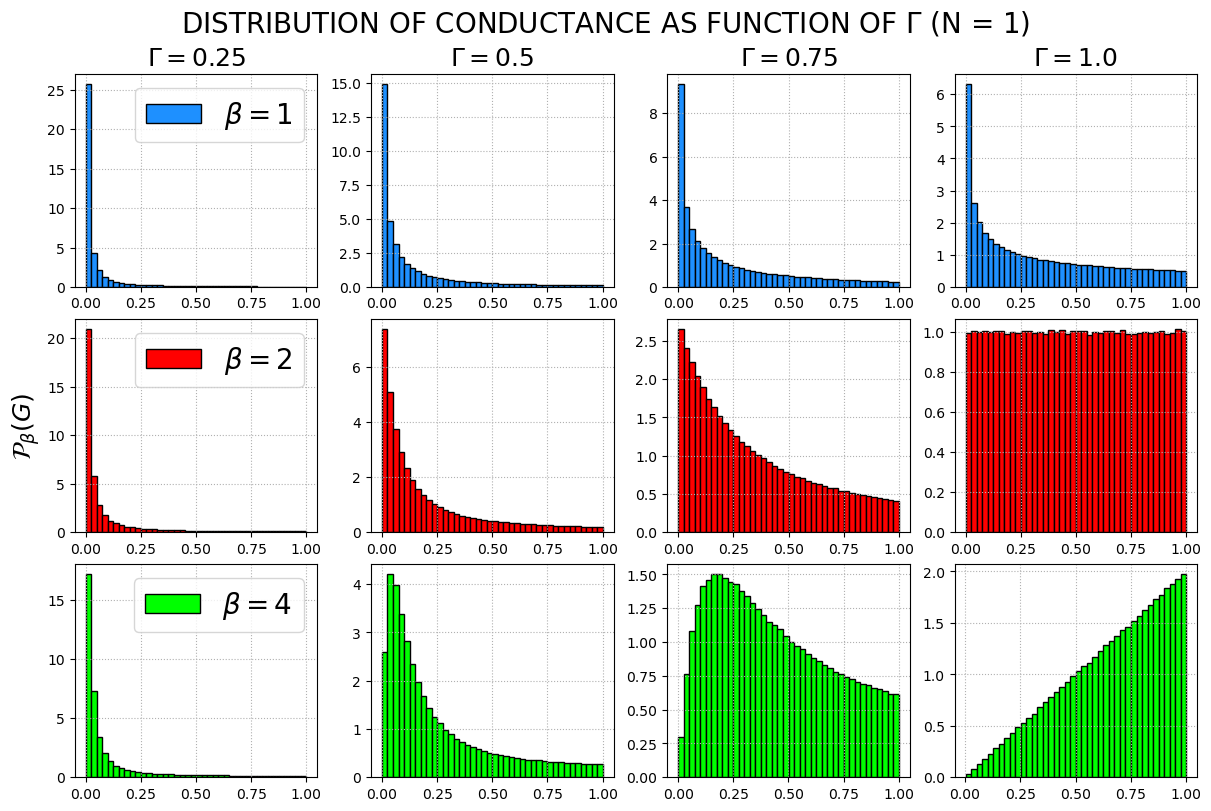

In [24]:
fig, axs = plt.subplots(3,4, figsize = (12,8), constrained_layout = True, facecolor = 'w')

fig.suptitle(r'DISTRIBUTION OF CONDUCTANCE AS FUNCTION OF $\Gamma$ (N = 1)', fontsize = 20)

for j in range(0,4):
    
    gamma_idx = 5*j+5
    
    gamma_value = 0.25*gamma_idx/5
    
    axs[0,j].hist(G_O_Gamma_N1[:,gamma_idx], bins = 40, color='dodgerblue', label = r'$\beta = 1$', alpha=1, density = True, histtype='bar', ec='black');
    axs[1,j].hist(G_U_Gamma_N1[:,gamma_idx], bins = 40, color='red', label = r'$\beta = 2$', alpha=1, density = True, histtype='bar', ec='black');
    axs[2,j].hist(G_S_Gamma_N1[:,gamma_idx], bins = 40, color='lime', label = r'$\beta = 4$', alpha=1, density = True, histtype='bar', ec='black');
    
    axs[0,j].set_title(r'$\Gamma = $'+ str(gamma_value), fontsize = 18)
    
    axs[1,0].set_ylabel(r'$\mathcal{P}_{\beta}(G)$', fontsize = 18)
    
    for i in range(0,3):
        axs[i,0].legend(fontsize = 20)
        axs[i,j].grid(linestyle=':')

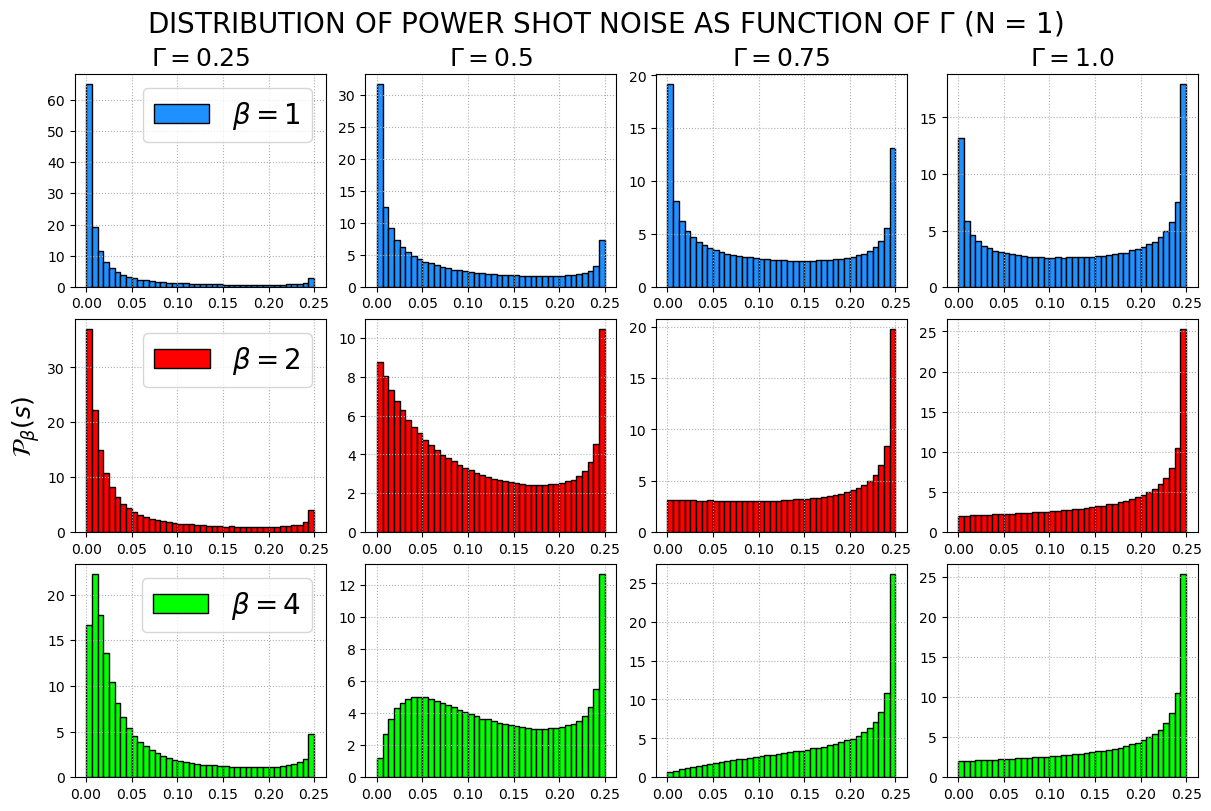

In [25]:
fig, axs = plt.subplots(3,4, figsize = (12,8), constrained_layout = True, facecolor = 'w')

fig.suptitle(r'DISTRIBUTION OF POWER SHOT NOISE AS FUNCTION OF $\Gamma$ (N = 1)', fontsize = 20)

for j in range(0,4):
    
    gamma_idx = 5*j+5
    
    gamma_value = 0.25*gamma_idx/5
    
    axs[0,j].hist(P_O_Gamma_N1[:,gamma_idx], bins = 40, color='dodgerblue', label = r'$\beta = 1$', alpha=1, density = True, histtype='bar', ec='black');
    axs[1,j].hist(P_U_Gamma_N1[:,gamma_idx], bins = 40, color='red', label = r'$\beta = 2$', alpha=1, density = True, histtype='bar', ec='black');
    axs[2,j].hist(P_S_Gamma_N1[:,gamma_idx], bins = 40, color='lime', label = r'$\beta = 4$', alpha=1, density = True, histtype='bar', ec='black');
    
    axs[0,j].set_title(r'$\Gamma = $'+ str(gamma_value), fontsize = 18)
    
    axs[1,0].set_ylabel(r'$\mathcal{P}_{\beta}(s)$', fontsize = 18)
    
    for i in range(0,3):
        axs[i,0].legend(fontsize = 20)
        axs[i,j].grid(linestyle=':')

Text(0, 0.5, '$\\delta g$')

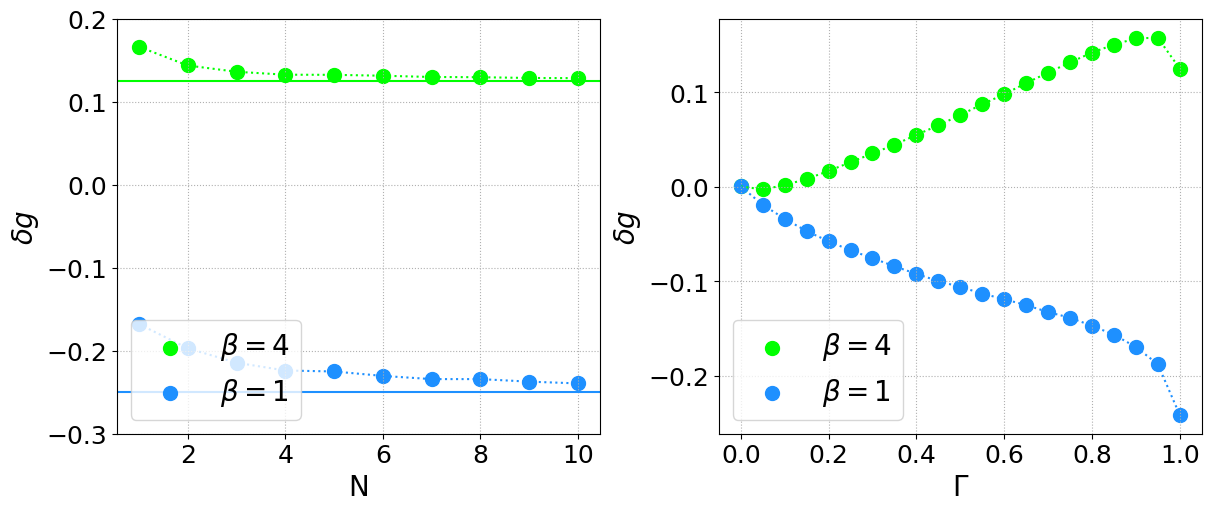

In [26]:
Gamma_variable = [(i/20) for i in range(0,21)]
meanG_U_10_new = [(1/2)*10*Gamma_variable[i]for i in range(0,21)]

fig, axs = plt.subplots(1,2, figsize = (12,5), constrained_layout = True, facecolor = 'w')

#fig.suptitle(r'QUANTUM INTERFERENCE CORRECTION OF CONDUCTANCE $G^{QIC}_{\beta}$ AS FUNCTION OF $\Gamma$', fontsize = 20)

axs[0].plot([i for i in range(1,11)], (meanG_S - meanG_U), color = 'lime', linestyle = ':', alpha = 1)
axs[0].plot([i for i in range(1,11)], (meanG_O - meanG_U), color = 'dodgerblue', linestyle = ':', alpha = 1)


axs[0].scatter([i for i in range(1,11)], (meanG_S - meanG_U), label = r'$\beta = 4$' , s = 100, color = 'lime', alpha = 1)
axs[0].scatter([i for i in range(1,11)], (meanG_O - meanG_U), label = r'$\beta = 1$', s = 100, color = 'dodgerblue', alpha = 1)

axs[0].set_xlabel('N', fontsize = 20)
axs[0].tick_params(axis = 'both', which = 'major', labelsize = 18)
axs[0].set_ylabel(r'$\delta g$', fontsize = 20)
axs[0].grid(linestyle=':')
axs[0].legend(loc = "lower left", fontsize = 20)

axs[0].axhline(y=(1/4)*(1-(2/1)), color='dodgerblue', linestyle='-')
axs[0].axhline(y=(1/4)*(1-(2/4)), color='lime', linestyle='-')

axs[0].set_ylim([-0.3, 0.2])

axs[1].plot([i/20 for i in range(0,21)], (meanG_S_10 - meanG_U_10_new), color = 'lime', linestyle = ':', alpha = 1)
axs[1].plot([i/20 for i in range(0,21)], (meanG_O_10 - meanG_U_10_new), color = 'dodgerblue', linestyle = ':', alpha = 1)

axs[1].scatter([i/20 for i in range(0,21)], (meanG_S_10 - meanG_U_10_new), label = r'$\beta = 4$' , s = 100, color = 'lime', alpha = 1)
axs[1].scatter([i/20 for i in range(0,21)], (meanG_O_10 - meanG_U_10_new), label = r'$\beta = 1$', s = 100, color = 'dodgerblue', alpha = 1)

axs[1].set_xlabel(r'$\Gamma$', fontsize = 20)
axs[1].tick_params(axis = 'both', which = 'major', labelsize = 18)
axs[1].grid(linestyle=':')
axs[1].legend(loc = "lower left", fontsize = 20)

#axs.axhline(y=0, color='dodgerblue', linestyle='-')
#axs.axhline(y=0, color='lime', linestyle='-')
axs[1].set_ylabel(r'$\delta g$', fontsize = 20)

#axs.set_ylim([-0.06, 0.05])

#exact_line = Line2D([0], [0], color='black', label='Exact', linewidth = '3')
#plt.legend(fontsize = 20)

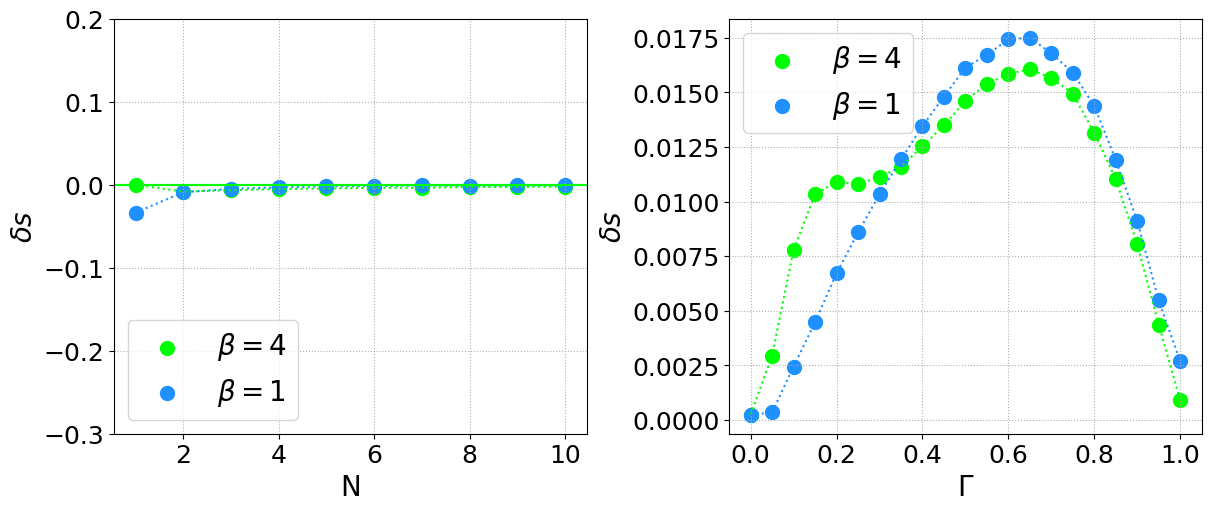

In [27]:
Gamma_variable = [(i/20) for i in range(0,21)]
meanP_U_10_new = [(1/8)*10*Gamma_variable[i]*(2-Gamma_variable[i]) for i in range(0,21)]

fig, axs = plt.subplots(1,2, figsize = (12,5), constrained_layout = True, facecolor = 'w')

#fig.suptitle(r'QUANTUM INTERFERENCE CORRECTION OF CONDUCTANCE $G^{QIC}_{\beta}$ AS FUNCTION OF $\Gamma$', fontsize = 20)

axs[0].plot([i for i in range(1,11)], (meanP_S - meanP_U), color = 'lime', linestyle = ':', alpha = 1)
axs[0].plot([i for i in range(1,11)], (meanP_O - meanP_U), color = 'dodgerblue', linestyle = ':', alpha = 1)


axs[0].scatter([i for i in range(1,11)], (meanP_S - meanP_U), label = r'$\beta = 4$' , s = 100, color = 'lime', alpha = 1)
axs[0].scatter([i for i in range(1,11)], (meanP_O - meanP_U), label = r'$\beta = 1$', s = 100, color = 'dodgerblue', alpha = 1)

axs[0].set_xlabel('N', fontsize = 20)
axs[0].tick_params(axis = 'both', which = 'major', labelsize = 18)
axs[0].set_ylabel(r'$\delta s$', fontsize = 20)
axs[0].grid(linestyle=':')
axs[0].legend(loc = "lower left", fontsize = 20)

axs[0].axhline(y=0, color='dodgerblue', linestyle='-')
axs[0].axhline(y=0, color='lime', linestyle='-')

axs[0].set_ylim([-0.3, 0.2])


axs[1].plot([i/20 for i in range(0,21)], (meanP_S_10 - meanP_U_10_new), color = 'lime', linestyle = ':', alpha = 1)
axs[1].plot([i/20 for i in range(0,21)], (meanP_O_10 - meanP_U_10_new), color = 'dodgerblue', linestyle = ':', alpha = 1)

axs[1].scatter([i/20 for i in range(0,21)], (meanP_S_10 - meanP_U_10_new), label = r'$\beta = 4$' , s = 100, color = 'lime', alpha = 1)
axs[1].scatter([i/20 for i in range(0,21)], (meanP_O_10 - meanP_U_10_new), label = r'$\beta = 1$', s = 100, color = 'dodgerblue', alpha = 1)

axs[1].set_xlabel(r'$\Gamma$', fontsize = 20)
axs[1].tick_params(axis = 'both', which = 'major', labelsize = 18)
axs[1].grid(linestyle=':')
axs[1].legend(loc = "lower left", fontsize = 20)

#axs.axhline(y=0, color='dodgerblue', linestyle='-')
#axs.axhline(y=0, color='lime', linestyle='-')
axs[1].set_ylabel(r'$\delta s$', fontsize = 20)

#axs.set_ylim([-0.06, 0.05])

#exact_line = Line2D([0], [0], color='black', label='Exact', linewidth = '3')
plt.legend(fontsize = 20)